In [1]:
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

!pip install pycountry
import pycountry

!pip install pandas sqlalchemy pymysql
from sqlalchemy import create_engine

import mysql.connector as db

C:\Users\Aartthi\AppData\Roaming\Python\Python310\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Defaulting to user installation because normal site-packages is not writeable
^C


In [3]:
!pip install pyodbc

Defaulting to user installation because normal site-packages is not writeable


# Collection of data from WHO URL

In [5]:
url1= "https://ghoapi.azureedge.net/api/NCD_BMI_30C"
url2= "https://ghoapi.azureedge.net/api/NCD_BMI_PLUS2C"
url3= "https://ghoapi.azureedge.net/api/NCD_BMI_18C"
url4= "https://ghoapi.azureedge.net/api/NCD_BMI_MINUS2C"

result1 = requests.get(url1)
result2 = requests.get(url2)
result3 = requests.get(url3)
result4 = requests.get(url4)

data1 = result1.json()
data2 = result2.json()
data3 = result3.json()
data4 = result4.json()

In [6]:
data1.keys()

dict_keys(['@odata.context', 'value'])

In [7]:
data2.keys()

dict_keys(['@odata.context', 'value'])

In [8]:
data3.keys()

dict_keys(['@odata.context', 'value'])

In [9]:
data4.keys()

dict_keys(['@odata.context', 'value'])

In [10]:
df1 = pd.DataFrame(data1['value'])

In [10]:
df1

,Id,IndicatorCode,SpatialDimType,SpatialDim,TimeDimType,ParentLocationCode,ParentLocation,Dim1Type,TimeDim,Dim1,...,DataSourceDim,Value,NumericValue,Low,High,Comments,Date,TimeDimensionValue,TimeDimensionBegin,TimeDimensionEnd
0,6646344,NCD_BMI_30C,COUNTRY,SVN,YEAR,EUR,Europe,SEX,2002,SEX_FMLE,...,None,15.6 [14.4-16.8],15.63678,14.43549,16.83291,None,2024-02-29T16:06:41.017+01:00,2002,2002-01-01T00:00:00+01:00,2002-12-31T00:00:00+01:00
1,259,NCD_BMI_30C,COUNTRY,KHM,YEAR,WPR,Western Pacific,SEX,2001,SEX_BTSX,...,None,1.0 [0.8-1.3],0.98170,0.75674,1.27487,None,2024-02-29T16:06:41.017+01:00,2001,2001-01-01T00:00:00+01:00,2001-12-31T00:00:00+01:00
2,350,NCD_BMI_30C,COUNTRY,IRN,YEAR,EMR,Eastern Mediterranean,SEX,2020,SEX_MLE,...,None,17.5 [15.8-19.2],17.48764,15.79378,19.24573,None,2024-02-29T16:06:41.017+01:00,2020,2020-01-01T00:00:00+01:00,2020-12-31T00:00:00+01:00
3,808,NCD_BMI_30C,COUNTRY,TJK,YEAR,EUR,Europe,SEX,1995,SEX_FMLE,...,None,7.9 [5.8-10.4],7.90484,5.78327,10.38715,None,2024-02-29T16:06:41.017+01:00,1995,1995-01-01T00:00:00+01:00,1995-12-31T00:00:00+01:00
4,1050,NCD_BMI_30C,COUNTRY,WSM,YEAR,WPR,Western Pacific,SEX,2003,SEX_BTSX,...,None,46.6 [44.6-48.7],46.62329,44.61686,48.69747,None,2024-02-29T16:06:41.017+01:00,2003,2003-01-01T00:00:00+01:00,2003-12-31T00:00:00+01:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20785,9730938,NCD_BMI_30C,COUNTRY,LTU,YEAR,EUR,Europe,SEX,2013,SEX_BTSX,...,None,27.4 [24.0-30.9],27.39776,24.04407,30.89829,None,2024-02-29T16:06:41.017+01:00,2013,2013-01-01T00:00:00+01:00,2013-12-31T00:00:00+01:00
20786,9731620,NCD_BMI_30C,COUNTRY,ARM,YEAR,EUR,Europe,SEX,1997,SEX_BTSX,...,None,14.0 [12.1-15.9],13.95061,12.09827,15.93363,None,2024-02-29T16:06:41.017+01:00,1997,1997-01-01T00:00:00+01:00,1997-12-31T00:00:00+01:00
20787,9732957,NCD_BMI_30C,COUNTRY,ERI,YEAR,AFR,Africa,SEX,2011,SEX_MLE,...,None,1.2 [0.8-1.8],1.20233,0.76718,1.78496,None,2024-02-29T16:06:41.017+01:00,2011,2011-01-01T00:00:00+01:00,2011-12-31T00:00:00+01:00
20788,9733064,NCD_BMI_30C,COUNTRY,VCT,YEAR,AMR,Americas,SEX,2003,SEX_MLE,...,None,10.2 [7.1-14.0],10.20733,7.09326,13.98207,None,2024-02-29T16:06:41.017+01:00,2003,2003-01-01T00:00:00+01:00,2003-12-31T00:00:00+01:00


In [11]:
df2 = pd.DataFrame(data2['value'])

In [12]:
df2

,Id,IndicatorCode,SpatialDimType,SpatialDim,ParentLocationCode,TimeDimType,ParentLocation,Dim1Type,Dim1,TimeDim,...,DataSourceDim,Value,NumericValue,Low,High,Comments,Date,TimeDimensionValue,TimeDimensionBegin,TimeDimensionEnd
0,169,NCD_BMI_PLUS2C,COUNTRY,URY,AMR,YEAR,Americas,SEX,SEX_BTSX,2014,...,None,16.6 [14.1-19.3],16.59945,14.13963,19.26034,None,2024-02-29T16:06:41.017+01:00,2014,2014-01-01T00:00:00+01:00,2014-12-31T00:00:00+01:00
1,541,NCD_BMI_PLUS2C,COUNTRY,AND,EUR,YEAR,Europe,SEX,SEX_MLE,1993,...,None,6.6 [1.7-15.5],6.57347,1.65166,15.45051,None,2024-02-29T16:06:41.017+01:00,1993,1993-01-01T00:00:00+01:00,1993-12-31T00:00:00+01:00
2,565,NCD_BMI_PLUS2C,COUNTRY,DOM,AMR,YEAR,Americas,SEX,SEX_FMLE,1995,...,None,5.2 [1.5-11.9],5.23866,1.45374,11.88873,None,2024-02-29T16:06:41.017+01:00,1995,1995-01-01T00:00:00+01:00,1995-12-31T00:00:00+01:00
3,642,NCD_BMI_PLUS2C,COUNTRY,ATG,AMR,YEAR,Americas,SEX,SEX_FMLE,1997,...,None,11.4 [5.2-19.7],11.39469,5.24510,19.66206,None,2024-02-29T16:06:41.017+01:00,1997,1997-01-01T00:00:00+01:00,1997-12-31T00:00:00+01:00
4,661,NCD_BMI_PLUS2C,COUNTRY,TKL,WPR,YEAR,Western Pacific,SEX,SEX_FMLE,2011,...,None,19.8 [11.9-29.1],19.77265,11.85124,29.14295,None,2024-02-29T16:06:41.017+01:00,2011,2011-01-01T00:00:00+01:00,2011-12-31T00:00:00+01:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62365,9732033,NCD_BMI_PLUS2C,COUNTRY,BEL,EUR,YEAR,Europe,SEX,SEX_BTSX,1997,...,None,5.1 [3.4-7.0],5.05149,3.43740,7.00625,None,2024-02-29T16:06:41.017+01:00,1997,1997-01-01T00:00:00+01:00,1997-12-31T00:00:00+01:00
62366,9732266,NCD_BMI_PLUS2C,COUNTRY,SDN,EMR,YEAR,Eastern Mediterranean,SEX,SEX_BTSX,2006,...,None,1.7 [0.7-3.4],1.71509,0.69364,3.38516,None,2024-02-29T16:06:41.017+01:00,2006,2006-01-01T00:00:00+01:00,2006-12-31T00:00:00+01:00
62367,9732599,NCD_BMI_PLUS2C,COUNTRY,CPV,AFR,YEAR,Africa,SEX,SEX_BTSX,2000,...,None,1.8 [0.4-5.0],1.84242,0.35935,5.00420,None,2024-02-29T16:06:41.017+01:00,2000,2000-01-01T00:00:00+01:00,2000-12-31T00:00:00+01:00
62368,9732633,NCD_BMI_PLUS2C,COUNTRY,STP,AFR,YEAR,Africa,SEX,SEX_MLE,2005,...,None,4.7 [0.9-12.3],4.68102,0.92881,12.27006,None,2024-02-29T16:06:41.017+01:00,2005,2005-01-01T00:00:00+01:00,2005-12-31T00:00:00+01:00


In [13]:
df3 = pd.DataFrame(data3['value'])

In [14]:
df3

,Id,IndicatorCode,SpatialDimType,SpatialDim,ParentLocationCode,TimeDimType,ParentLocation,Dim1Type,TimeDim,Dim1,...,DataSourceDim,Value,NumericValue,Low,High,Comments,Date,TimeDimensionValue,TimeDimensionBegin,TimeDimensionEnd
0,53,NCD_BMI_18C,COUNTRY,GAB,AFR,YEAR,Africa,SEX,2021,SEX_FMLE,...,None,5.8 [4.0-8.1],5.79511,3.97204,8.07702,None,2024-02-29T16:06:41.017+01:00,2021,2021-01-01T00:00:00+01:00,2021-12-31T00:00:00+01:00
1,404,NCD_BMI_18C,COUNTRY,TUV,WPR,YEAR,Western Pacific,SEX,2001,SEX_BTSX,...,None,0.9 [0.4-1.9],0.93657,0.36515,1.85929,None,2024-02-29T16:06:41.017+01:00,2001,2001-01-01T00:00:00+01:00,2001-12-31T00:00:00+01:00
2,1627,NCD_BMI_18C,COUNTRY,GHA,AFR,YEAR,Africa,SEX,2002,SEX_MLE,...,None,13.2 [10.0-16.7],13.20428,10.04854,16.71203,None,2024-02-29T16:06:41.017+01:00,2002,2002-01-01T00:00:00+01:00,2002-12-31T00:00:00+01:00
3,1997,NCD_BMI_18C,COUNTRY,TCD,AFR,YEAR,Africa,SEX,1990,SEX_BTSX,...,None,23.2 [17.8-29.0],23.20135,17.80808,28.99020,None,2024-02-29T16:06:41.017+01:00,1990,1990-01-01T00:00:00+01:00,1990-12-31T00:00:00+01:00
4,2197,NCD_BMI_18C,COUNTRY,MNG,WPR,YEAR,Western Pacific,SEX,2017,SEX_BTSX,...,None,3.1 [2.4-3.8],3.09065,2.42823,3.84215,None,2024-02-29T16:06:41.017+01:00,2017,2017-01-01T00:00:00+01:00,2017-12-31T00:00:00+01:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20785,9731816,NCD_BMI_18C,COUNTRY,BGR,EUR,YEAR,Europe,SEX,1997,SEX_MLE,...,None,2.2 [1.2-3.6],2.21353,1.20464,3.57760,None,2024-02-29T16:06:41.017+01:00,1997,1997-01-01T00:00:00+01:00,1997-12-31T00:00:00+01:00
20786,9732191,NCD_BMI_18C,COUNTRY,ITA,EUR,YEAR,Europe,SEX,1991,SEX_MLE,...,None,1.2 [0.9-1.6],1.23241,0.93235,1.59651,None,2024-02-29T16:06:41.017+01:00,1991,1991-01-01T00:00:00+01:00,1991-12-31T00:00:00+01:00
20787,9732454,NCD_BMI_18C,COUNTRY,PRK,SEAR,YEAR,South-East Asia,SEX,2013,SEX_BTSX,...,None,12.5 [6.2-20.7],12.46924,6.20246,20.72296,None,2024-02-29T16:06:41.017+01:00,2013,2013-01-01T00:00:00+01:00,2013-12-31T00:00:00+01:00
20788,9732516,NCD_BMI_18C,COUNTRY,BMU,AMR,YEAR,Americas,SEX,1998,SEX_MLE,...,None,7.3 [2.4-15.5],7.30252,2.36090,15.54348,None,2024-02-29T16:06:41.017+01:00,1998,1998-01-01T00:00:00+01:00,1998-12-31T00:00:00+01:00


In [15]:
df4 = pd.DataFrame(data4['value'])

In [16]:
df4

,Id,IndicatorCode,SpatialDimType,SpatialDim,TimeDimType,ParentLocationCode,ParentLocation,Dim1Type,TimeDim,Dim1,...,DataSourceDim,Value,NumericValue,Low,High,Comments,Date,TimeDimensionValue,TimeDimensionBegin,TimeDimensionEnd
0,24,NCD_BMI_MINUS2C,COUNTRY,AUT,YEAR,EUR,Europe,SEX,2009,SEX_FMLE,...,None,2.1 [1.5-2.8],2.09791,1.51196,2.81474,None,2024-02-29T16:06:41.017+01:00,2009,2009-01-01T00:00:00+01:00,2009-12-31T00:00:00+01:00
1,31,NCD_BMI_MINUS2C,COUNTRY,FIN,YEAR,EUR,Europe,SEX,2004,SEX_BTSX,...,None,1.5 [1.0-2.2],1.49835,0.96447,2.20160,None,2024-02-29T16:06:41.017+01:00,2004,2004-01-01T00:00:00+01:00,2004-12-31T00:00:00+01:00
2,42,NCD_BMI_MINUS2C,COUNTRY,ASM,YEAR,WPR,Western Pacific,SEX,2009,SEX_MLE,...,None,0.8 [0.1-2.6],0.84561,0.13138,2.59345,None,2024-02-29T16:06:41.017+01:00,2009,2009-01-01T00:00:00+01:00,2009-12-31T00:00:00+01:00
3,143,NCD_BMI_MINUS2C,COUNTRY,SUR,YEAR,AMR,Americas,SEX,2010,SEX_FMLE,...,None,4.9 [1.3-11.3],4.89311,1.32832,11.34398,None,2024-02-29T16:06:41.017+01:00,2010,2010-01-01T00:00:00+01:00,2010-12-31T00:00:00+01:00
4,328,NCD_BMI_MINUS2C,COUNTRY,BRA,YEAR,AMR,Americas,SEX,2010,SEX_MLE,...,None,2.7 [2.4-3.2],2.73947,2.35242,3.15723,None,2024-02-29T16:06:41.017+01:00,2010,2010-01-01T00:00:00+01:00,2010-12-31T00:00:00+01:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62365,9731409,NCD_BMI_MINUS2C,COUNTRY,PNG,YEAR,WPR,Western Pacific,SEX,2009,SEX_FMLE,...,None,1.1 [0.1-4.0],1.11686,0.10550,3.96189,None,2024-02-29T16:06:41.017+01:00,2009,2009-01-01T00:00:00+01:00,2009-12-31T00:00:00+01:00
62366,9731703,NCD_BMI_MINUS2C,COUNTRY,WSM,YEAR,WPR,Western Pacific,SEX,2020,SEX_FMLE,...,None,0.7 [0.1-2.8],0.73407,0.06415,2.81018,None,2024-02-29T16:06:41.017+01:00,2020,2020-01-01T00:00:00+01:00,2020-12-31T00:00:00+01:00
62367,9732590,NCD_BMI_MINUS2C,COUNTRY,IDN,YEAR,SEAR,South-East Asia,SEX,1999,SEX_MLE,...,None,13.3 [11.3-15.3],13.28270,11.34984,15.32561,None,2024-02-29T16:06:41.017+01:00,1999,1999-01-01T00:00:00+01:00,1999-12-31T00:00:00+01:00
62368,9732660,NCD_BMI_MINUS2C,COUNTRY,MWI,YEAR,AFR,Africa,SEX,2003,SEX_FMLE,...,None,3.8 [2.7-5.1],3.76525,2.65127,5.06782,None,2024-02-29T16:06:41.017+01:00,2003,2003-01-01T00:00:00+01:00,2003-12-31T00:00:00+01:00


# Inclusion of a new Column called Age_group

In [17]:
df1["Age_group"]="adult"

In [18]:
df2["Age_group"]="child"

In [19]:
df3["Age_group"]="adult"

In [20]:
df4["Age_group"]="child"

In [21]:
# Concatination of dataframes and created df_obesity & df_malnutrition

In [22]:
df_obesity= pd.concat([df1,df2])

In [23]:
df_obesity.head()

,Id,IndicatorCode,SpatialDimType,SpatialDim,ParentLocationCode,TimeDimType,ParentLocation,Dim1Type,Dim1,TimeDim,...,Value,NumericValue,Low,High,Comments,Date,TimeDimensionValue,TimeDimensionBegin,TimeDimensionEnd,Age_group
0,257,NCD_BMI_30C,COUNTRY,KHM,WPR,YEAR,Western Pacific,SEX,SEX_BTSX,2001,...,1.0 [0.8-1.3],0.98170,0.75674,1.27487,None,2024-02-29T16:06:41.017+01:00,2001,2001-01-01T00:00:00+01:00,2001-12-31T00:00:00+01:00,adult
1,349,NCD_BMI_30C,COUNTRY,IRN,EMR,YEAR,Eastern Mediterranean,SEX,SEX_MLE,2020,...,17.5 [15.8-19.2],17.48764,15.79378,19.24573,None,2024-02-29T16:06:41.017+01:00,2020,2020-01-01T00:00:00+01:00,2020-12-31T00:00:00+01:00,adult
2,807,NCD_BMI_30C,COUNTRY,TJK,EUR,YEAR,Europe,SEX,SEX_FMLE,1995,...,7.9 [5.8-10.4],7.90484,5.78327,10.38715,None,2024-02-29T16:06:41.017+01:00,1995,1995-01-01T00:00:00+01:00,1995-12-31T00:00:00+01:00,adult
3,1049,NCD_BMI_30C,COUNTRY,WSM,WPR,YEAR,Western Pacific,SEX,SEX_BTSX,2003,...,46.6 [44.6-48.7],46.62329,44.61686,48.69747,None,2024-02-29T16:06:41.017+01:00,2003,2003-01-01T00:00:00+01:00,2003-12-31T00:00:00+01:00,adult
4,1196,NCD_BMI_30C,COUNTRY,NIU,WPR,YEAR,Western Pacific,SEX,SEX_BTSX,2000,...,54.6 [49.4-59.8],54.64320,49.43577,59.77076,None,2024-02-29T16:06:41.017+01:00,2000,2000-01-01T00:00:00+01:00,2000-12-31T00:00:00+01:00,adult


In [24]:
df_malnutrition= pd.concat([df3,df4])

In [25]:
df_malnutrition.head()

,Id,IndicatorCode,SpatialDimType,SpatialDim,ParentLocationCode,TimeDimType,ParentLocation,Dim1Type,TimeDim,Dim1,...,Value,NumericValue,Low,High,Comments,Date,TimeDimensionValue,TimeDimensionBegin,TimeDimensionEnd,Age_group
0,53,NCD_BMI_18C,COUNTRY,GAB,AFR,YEAR,Africa,SEX,2021,SEX_FMLE,...,5.8 [4.0-8.1],5.79511,3.97204,8.07702,None,2024-02-29T16:06:41.017+01:00,2021,2021-01-01T00:00:00+01:00,2021-12-31T00:00:00+01:00,adult
1,404,NCD_BMI_18C,COUNTRY,TUV,WPR,YEAR,Western Pacific,SEX,2001,SEX_BTSX,...,0.9 [0.4-1.9],0.93657,0.36515,1.85929,None,2024-02-29T16:06:41.017+01:00,2001,2001-01-01T00:00:00+01:00,2001-12-31T00:00:00+01:00,adult
2,1627,NCD_BMI_18C,COUNTRY,GHA,AFR,YEAR,Africa,SEX,2002,SEX_MLE,...,13.2 [10.0-16.7],13.20428,10.04854,16.71203,None,2024-02-29T16:06:41.017+01:00,2002,2002-01-01T00:00:00+01:00,2002-12-31T00:00:00+01:00,adult
3,1997,NCD_BMI_18C,COUNTRY,TCD,AFR,YEAR,Africa,SEX,1990,SEX_BTSX,...,23.2 [17.8-29.0],23.20135,17.80808,28.99020,None,2024-02-29T16:06:41.017+01:00,1990,1990-01-01T00:00:00+01:00,1990-12-31T00:00:00+01:00,adult
4,2197,NCD_BMI_18C,COUNTRY,MNG,WPR,YEAR,Western Pacific,SEX,2017,SEX_BTSX,...,3.1 [2.4-3.8],3.09065,2.42823,3.84215,None,2024-02-29T16:06:41.017+01:00,2017,2017-01-01T00:00:00+01:00,2017-12-31T00:00:00+01:00,adult


In [26]:
df_obesity.keys()

Index(['Id', 'IndicatorCode', 'SpatialDimType', 'SpatialDim',
       'ParentLocationCode', 'TimeDimType', 'ParentLocation', 'Dim1Type',
       'Dim1', 'TimeDim', 'Dim2Type', 'Dim2', 'Dim3Type', 'Dim3',
       'DataSourceDimType', 'DataSourceDim', 'Value', 'NumericValue', 'Low',
       'High', 'Comments', 'Date', 'TimeDimensionValue', 'TimeDimensionBegin',
       'TimeDimensionEnd', 'Age_group'],
      dtype='object')

# Filteration of required columns

In [27]:
df_obesity = df_obesity.filter(items=["ParentLocation","Dim1","TimeDim","Low","High","NumericValue","SpatialDim","IndicatorCode"])

In [28]:
df_obesity

,ParentLocation,Dim1,TimeDim,Low,High,NumericValue,SpatialDim,IndicatorCode
0,Western Pacific,SEX_BTSX,2001,0.75674,1.27487,0.98170,KHM,NCD_BMI_30C
1,Eastern Mediterranean,SEX_MLE,2020,15.79378,19.24573,17.48764,IRN,NCD_BMI_30C
2,Europe,SEX_FMLE,1995,5.78327,10.38715,7.90484,TJK,NCD_BMI_30C
3,Western Pacific,SEX_BTSX,2003,44.61686,48.69747,46.62329,WSM,NCD_BMI_30C
4,Western Pacific,SEX_BTSX,2000,49.43577,59.77076,54.64320,NIU,NCD_BMI_30C
...,...,...,...,...,...,...,...,...
62365,Europe,SEX_BTSX,1997,3.43740,7.00625,5.05149,BEL,NCD_BMI_PLUS2C
62366,Eastern Mediterranean,SEX_BTSX,2006,0.69364,3.38516,1.71509,SDN,NCD_BMI_PLUS2C
62367,Africa,SEX_BTSX,2000,0.35935,5.00420,1.84242,CPV,NCD_BMI_PLUS2C
62368,Africa,SEX_MLE,2005,0.92881,12.27006,4.68102,STP,NCD_BMI_PLUS2C


In [29]:
df_malnutrition = df_malnutrition.filter(items=["ParentLocation","Dim1","TimeDim","Low","High","NumericValue","SpatialDim","IndicatorCode"])

In [30]:
df_malnutrition

,ParentLocation,Dim1,TimeDim,Low,High,NumericValue,SpatialDim,IndicatorCode
0,Africa,SEX_FMLE,2021,3.97204,8.07702,5.79511,GAB,NCD_BMI_18C
1,Western Pacific,SEX_BTSX,2001,0.36515,1.85929,0.93657,TUV,NCD_BMI_18C
2,Africa,SEX_MLE,2002,10.04854,16.71203,13.20428,GHA,NCD_BMI_18C
3,Africa,SEX_BTSX,1990,17.80808,28.99020,23.20135,TCD,NCD_BMI_18C
4,Western Pacific,SEX_BTSX,2017,2.42823,3.84215,3.09065,MNG,NCD_BMI_18C
...,...,...,...,...,...,...,...,...
62365,Western Pacific,SEX_FMLE,2009,0.10550,3.96189,1.11686,PNG,NCD_BMI_MINUS2C
62366,Western Pacific,SEX_FMLE,2020,0.06415,2.81018,0.73407,WSM,NCD_BMI_MINUS2C
62367,South-East Asia,SEX_MLE,1999,11.34984,15.32561,13.28270,IDN,NCD_BMI_MINUS2C
62368,Africa,SEX_FMLE,2003,2.65127,5.06782,3.76525,MWI,NCD_BMI_MINUS2C


# Renaming the column names

In [31]:
df_obesity.keys()

Index(['ParentLocation', 'Dim1', 'TimeDim', 'Low', 'High', 'NumericValue',
       'SpatialDim', 'IndicatorCode'],
      dtype='object')

In [32]:
df_obesity = df_obesity.rename(columns={
    
    'ParentLocation':'Region',
    'Dim1':'Gender',
    'TimeDim':'Year',
    'Low':'LowerBound',
    'High':'UpperBound',
    'NumericValue':'Mean_Estimate',
    'SpatialDim':'Country'
})

In [33]:
df_obesity


,Region,Gender,Year,LowerBound,UpperBound,Mean_Estimate,Country,IndicatorCode
0,Western Pacific,SEX_BTSX,2001,0.75674,1.27487,0.98170,KHM,NCD_BMI_30C
1,Eastern Mediterranean,SEX_MLE,2020,15.79378,19.24573,17.48764,IRN,NCD_BMI_30C
2,Europe,SEX_FMLE,1995,5.78327,10.38715,7.90484,TJK,NCD_BMI_30C
3,Western Pacific,SEX_BTSX,2003,44.61686,48.69747,46.62329,WSM,NCD_BMI_30C
4,Western Pacific,SEX_BTSX,2000,49.43577,59.77076,54.64320,NIU,NCD_BMI_30C
...,...,...,...,...,...,...,...,...
62365,Europe,SEX_BTSX,1997,3.43740,7.00625,5.05149,BEL,NCD_BMI_PLUS2C
62366,Eastern Mediterranean,SEX_BTSX,2006,0.69364,3.38516,1.71509,SDN,NCD_BMI_PLUS2C
62367,Africa,SEX_BTSX,2000,0.35935,5.00420,1.84242,CPV,NCD_BMI_PLUS2C
62368,Africa,SEX_MLE,2005,0.92881,12.27006,4.68102,STP,NCD_BMI_PLUS2C


In [34]:
df_obesity.dtypes

Region            object
Gender            object
Year               int64
LowerBound       float64
UpperBound       float64
Mean_Estimate    float64
Country           object
IndicatorCode     object
dtype: object

In [35]:
df_malnutrition = df_malnutrition.rename(columns={
    
    'ParentLocation':'Region',
    'Dim1':'Gender',
    'TimeDim':'Year',
    'Low':'LowerBound',
    'High':'UpperBound',
    'NumericValue':'Mean_Estimate',
    'SpatialDim':'Country'
})

In [36]:
df_malnutrition

,Region,Gender,Year,LowerBound,UpperBound,Mean_Estimate,Country,IndicatorCode
0,Africa,SEX_FMLE,2021,3.97204,8.07702,5.79511,GAB,NCD_BMI_18C
1,Western Pacific,SEX_BTSX,2001,0.36515,1.85929,0.93657,TUV,NCD_BMI_18C
2,Africa,SEX_MLE,2002,10.04854,16.71203,13.20428,GHA,NCD_BMI_18C
3,Africa,SEX_BTSX,1990,17.80808,28.99020,23.20135,TCD,NCD_BMI_18C
4,Western Pacific,SEX_BTSX,2017,2.42823,3.84215,3.09065,MNG,NCD_BMI_18C
...,...,...,...,...,...,...,...,...
62365,Western Pacific,SEX_FMLE,2009,0.10550,3.96189,1.11686,PNG,NCD_BMI_MINUS2C
62366,Western Pacific,SEX_FMLE,2020,0.06415,2.81018,0.73407,WSM,NCD_BMI_MINUS2C
62367,South-East Asia,SEX_MLE,1999,11.34984,15.32561,13.28270,IDN,NCD_BMI_MINUS2C
62368,Africa,SEX_FMLE,2003,2.65127,5.06782,3.76525,MWI,NCD_BMI_MINUS2C


# Filteration of the Year between 2012 to 2022

In [37]:
df_obesity= df_obesity[df_obesity["Year"].between(2012,2022)]

In [38]:
obes=df_obesity

In [39]:
df_malnutrition= df_malnutrition[df_malnutrition["Year"].between(2012,2022)]

In [40]:
mal=df_malnutrition

In [41]:
obes.loc[obes["Gender"]=="SEX_FMLE", "Gender"] = "Female"                                                                                                                   

In [42]:
obes.loc[obes["Gender"]=="SEX_MLE", "Gender"] = "Male"  

In [43]:
obes.loc[obes["Gender"]=="SEX_BTSX", "Gender"] = "Both" 

In [44]:
df_obesity=obes

In [45]:
mal.loc[mal["Gender"]=="SEX_FMLE", "Gender"] = "Female"                                                                                                                   

In [46]:
mal.loc[mal["Gender"]=="SEX_MLE", "Gender"] = "Male"

In [47]:
mal.loc[mal["Gender"]=="SEX_BTSX", "Gender"] = "Both" 

In [48]:
df_malnutrition= mal

In [49]:
df_malnutrition.reset_index()

,index,Region,Gender,Year,LowerBound,UpperBound,Mean_Estimate,Country,IndicatorCode
0,0,Africa,Female,2021,3.97204,8.07702,5.79511,GAB,NCD_BMI_18C
1,4,Western Pacific,Both,2017,2.42823,3.84215,3.09065,MNG,NCD_BMI_18C
2,5,Africa,Female,2016,6.65567,10.25312,8.37172,SLE,NCD_BMI_18C
3,7,None,Both,2021,12.24232,14.44287,13.33635,SEAR,NCD_BMI_18C
4,9,Eastern Mediterranean,Male,2014,1.25384,3.51682,2.20807,QAT,NCD_BMI_18C
...,...,...,...,...,...,...,...,...,...
27715,62357,Americas,Female,2013,2.79550,5.71434,4.14069,HTI,NCD_BMI_MINUS2C
27716,62359,Europe,Both,2018,5.42817,10.21840,7.57499,TJK,NCD_BMI_MINUS2C
27717,62360,Western Pacific,Both,2016,0.62172,3.50706,1.70365,PNG,NCD_BMI_MINUS2C
27718,62366,Western Pacific,Female,2020,0.06415,2.81018,0.73407,WSM,NCD_BMI_MINUS2C


In [50]:
df_obesity.reset_index()

,index,Region,Gender,Year,LowerBound,UpperBound,Mean_Estimate,Country,IndicatorCode
0,1,Eastern Mediterranean,Male,2020,15.79378,19.24573,17.48764,IRN,NCD_BMI_30C
1,8,Eastern Mediterranean,Male,2020,23.08959,33.81534,28.33553,IRQ,NCD_BMI_30C
2,14,Europe,Female,2014,24.92477,31.21326,27.94870,GRL,NCD_BMI_30C
3,16,Europe,Female,2019,28.16068,35.57493,31.89322,ARM,NCD_BMI_30C
4,17,Europe,Both,2018,29.90581,37.47086,33.69421,MLT,NCD_BMI_30C
...,...,...,...,...,...,...,...,...,...
27715,62347,Europe,Both,2020,0.96418,2.19743,1.47593,TJK,NCD_BMI_PLUS2C
27716,62350,Eastern Mediterranean,Female,2012,0.30204,5.87241,1.96619,SOM,NCD_BMI_PLUS2C
27717,62358,Western Pacific,Male,2021,3.32590,34.87782,16.63489,VUT,NCD_BMI_PLUS2C
27718,62361,Africa,Male,2014,0.23648,6.34118,2.03219,MDG,NCD_BMI_PLUS2C


# covertion of country name

In [51]:
special_cases = {
                    'GLOBAL': 'Global',
                    'WB_LMI': 'Low & Middle Income',
                    'WB_HI': 'High Income',
                    'WB_LI': 'Low Income',
                    'EMR': 'Eastern Mediterranean Region',
                    'EUR': 'Europe',
                    'AFR': 'Africa',
                    'SEAR': 'South-East Asia Region',
                    'WPR': 'Western Pacific Region',
                    'AMR': 'Americas Region',
                    'WB_UMI': 'Upper Middle Income'}

In [52]:
df_obesity['Country']=df_obesity['Country'].replace(special_cases)

C:\Users\Aartthi\AppData\Local\Temp\ipykernel_34488\1442602731.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_obesity['Country']=df_obesity['Country'].replace(special_cases)


In [53]:
for index, value in df_obesity['Country'].items():
    if len(value)==3:
        country = pycountry.countries.get(alpha_3=value)
        #print(country.name)
        df_obesity.loc[index, 'Country'] = country.name
       
        

In [54]:
df_obesity['Country'].unique()

array(['Iran, Islamic Republic of', 'Iraq', 'Greenland', 'Armenia',
       'Malta', 'Panama', 'India', 'Madagascar', 'Guinea', 'Philippines',
       'Yemen', 'Jordan', 'Botswana', 'New Zealand', 'Mauritius',
       'Belarus', 'Belgium', 'Uganda', 'North Macedonia',
       'American Samoa', 'Gabon', 'Equatorial Guinea', 'Senegal',
       'Bulgaria', 'Pakistan', 'Tuvalu', 'Israel', 'Namibia',
       'Uzbekistan', 'Algeria', 'Georgia', 'Kazakhstan', 'Burundi',
       'French Polynesia', 'Bolivia, Plurinational State of', 'Hungary',
       'Congo', 'Paraguay', 'Switzerland', 'Ireland', 'Brazil',
       'Eswatini', 'Sri Lanka', 'Liberia',
       'Venezuela, Bolivarian Republic of', 'Samoa', 'Belize',
       'High Income', 'Kyrgyzstan', 'Lesotho', 'Papua New Guinea',
       'Australia', 'Tokelau', 'Peru', 'Rwanda', 'Malaysia',
       'El Salvador', 'Montenegro', 'Korea, Republic of', 'Uruguay',
       'Canada', 'Egypt', 'Türkiye', 'Bhutan', 'Malawi',
       "Korea, Democratic People's Republ

In [55]:
df_malnutrition['Country']=df_malnutrition['Country'].replace(special_cases)

C:\Users\Aartthi\AppData\Local\Temp\ipykernel_34488\681636060.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_malnutrition['Country']=df_malnutrition['Country'].replace(special_cases)


In [56]:
for index, value in df_malnutrition['Country'].items():
    if len(value)==3:
        country1 = pycountry.countries.get(alpha_3=value)
        #print(country.name)
        df_malnutrition.loc[index, 'Country'] = country1.name
       
        

In [57]:
df_malnutrition['Country'].unique()

array(['Gabon', 'Mongolia', 'Sierra Leone', 'North Macedonia', 'Qatar',
       'Uzbekistan', 'United Kingdom', 'Honduras', 'Vanuatu',
       'Montenegro', 'Trinidad and Tobago', 'Cook Islands', 'Lesotho',
       'Germany', 'Gambia', 'Low Income',
       'Venezuela, Bolivarian Republic of', 'Cyprus', 'Congo', 'Niue',
       'Algeria', 'Latvia', 'Palau', 'Croatia', 'South-East Asia Region',
       'Peru', 'Tonga', 'Afghanistan', 'Italy', 'Myanmar', 'Benin',
       'Kiribati', 'Malta', 'Jamaica', 'Maldives',
       'Bolivia, Plurinational State of', 'Kyrgyzstan', 'Lithuania',
       'South Africa', 'Ecuador', 'Greece', 'Australia', 'El Salvador',
       'Malawi', 'Nauru', 'Seychelles', 'Paraguay', 'Singapore',
       'Tanzania, United Republic of', 'Guatemala', 'Palestine, State of',
       'Congo, The Democratic Republic of the', 'Netherlands', 'Iraq',
       "Korea, Democratic People's Republic of", 'Bosnia and Herzegovina',
       'Costa Rica', 'Antigua and Barbuda', 'American Samoa', 

# Creation of new columns : Age_Group, CI_Width , Obesity_Level, Malnutrition_Level

In [58]:
values_for_adult=['NCD_BMI_30C','NCD_BMI_18C']
values_for_child=['NCD_BMI_PLUS2C','NCD_BMI_MINUS2C']

In [59]:
 df_obesity['Age_Group']= df_obesity['IndicatorCode'].apply(lambda x : 'Adult' if x in values_for_adult else x)

C:\Users\Aartthi\AppData\Local\Temp\ipykernel_34488\1215857185.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_obesity['Age_Group']= df_obesity['IndicatorCode'].apply(lambda x : 'Adult' if x in values_for_adult else x)


In [75]:
df_obesity

,Region,Gender,Year,LowerBound,UpperBound,Mean_Estimate,Country,IndicatorCode,Age_Group,CI_Width,Obesity_Level
1,Eastern Mediterranean,Male,2020,15.79378,19.24573,17.49,"Iran, Islamic Republic of",NCD_BMI_30C,Adult,3.45195,Low
8,Eastern Mediterranean,Male,2020,23.08959,33.81534,28.34,Iraq,NCD_BMI_30C,Adult,10.72575,Moderate
14,Europe,Female,2014,24.92477,31.21326,27.95,Greenland,NCD_BMI_30C,Adult,6.28849,Moderate
16,Europe,Female,2019,28.16068,35.57493,31.89,Armenia,NCD_BMI_30C,Adult,7.41425,High
17,Europe,Both,2018,29.90581,37.47086,33.69,Malta,NCD_BMI_30C,Adult,7.56505,High
...,...,...,...,...,...,...,...,...,...,...,...
62347,Europe,Both,2020,0.96418,2.19743,1.48,Tajikistan,NCD_BMI_PLUS2C,Child,1.23325,Low
62350,Eastern Mediterranean,Female,2012,0.30204,5.87241,1.97,Somalia,NCD_BMI_PLUS2C,Child,5.57037,Low
62358,Western Pacific,Male,2021,3.32590,34.87782,16.63,Vanuatu,NCD_BMI_PLUS2C,Child,31.55192,Low
62361,Africa,Male,2014,0.23648,6.34118,2.03,Madagascar,NCD_BMI_PLUS2C,Child,6.10470,Low


In [76]:
df_obesity.loc[df_obesity['Age_Group'].isin(values_for_child),"Age_Group"]= 'Child'

In [77]:
 df_malnutrition['Age_Group']= df_malnutrition['IndicatorCode'].apply(lambda x : 'Adult' if x in values_for_adult else x)

C:\Users\Aartthi\AppData\Local\Temp\ipykernel_34488\699305440.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_malnutrition['Age_Group']= df_malnutrition['IndicatorCode'].apply(lambda x : 'Adult' if x in values_for_adult else x)


In [78]:
 df_malnutrition

,Region,Gender,Year,LowerBound,UpperBound,Mean_Estimate,Country,IndicatorCode,Age_Group,CI_Width
0,Africa,Female,2021,3.97204,8.07702,5.80,Gabon,NCD_BMI_18C,Adult,4.10498
4,Western Pacific,Both,2017,2.42823,3.84215,3.09,Mongolia,NCD_BMI_18C,Adult,1.41392
5,Africa,Female,2016,6.65567,10.25312,8.37,Sierra Leone,NCD_BMI_18C,Adult,3.59745
7,None,Both,2021,12.24232,14.44287,13.34,North Macedonia,NCD_BMI_18C,Adult,2.20055
9,Eastern Mediterranean,Male,2014,1.25384,3.51682,2.21,Qatar,NCD_BMI_18C,Adult,2.26298
...,...,...,...,...,...,...,...,...,...,...
62357,Americas,Female,2013,2.79550,5.71434,4.14,Haiti,NCD_BMI_MINUS2C,NCD_BMI_MINUS2C,2.91884
62359,Europe,Both,2018,5.42817,10.21840,7.57,Tajikistan,NCD_BMI_MINUS2C,NCD_BMI_MINUS2C,4.79023
62360,Western Pacific,Both,2016,0.62172,3.50706,1.70,Papua New Guinea,NCD_BMI_MINUS2C,NCD_BMI_MINUS2C,2.88534
62366,Western Pacific,Female,2020,0.06415,2.81018,0.73,Samoa,NCD_BMI_MINUS2C,NCD_BMI_MINUS2C,2.74603


In [79]:
df_malnutrition.loc[df_malnutrition['Age_Group'].isin(values_for_child),"Age_Group"]= 'Child'

In [80]:
df_malnutrition

,Region,Gender,Year,LowerBound,UpperBound,Mean_Estimate,Country,IndicatorCode,Age_Group,CI_Width
0,Africa,Female,2021,3.97204,8.07702,5.80,Gabon,NCD_BMI_18C,Adult,4.10498
4,Western Pacific,Both,2017,2.42823,3.84215,3.09,Mongolia,NCD_BMI_18C,Adult,1.41392
5,Africa,Female,2016,6.65567,10.25312,8.37,Sierra Leone,NCD_BMI_18C,Adult,3.59745
7,None,Both,2021,12.24232,14.44287,13.34,North Macedonia,NCD_BMI_18C,Adult,2.20055
9,Eastern Mediterranean,Male,2014,1.25384,3.51682,2.21,Qatar,NCD_BMI_18C,Adult,2.26298
...,...,...,...,...,...,...,...,...,...,...
62357,Americas,Female,2013,2.79550,5.71434,4.14,Haiti,NCD_BMI_MINUS2C,Child,2.91884
62359,Europe,Both,2018,5.42817,10.21840,7.57,Tajikistan,NCD_BMI_MINUS2C,Child,4.79023
62360,Western Pacific,Both,2016,0.62172,3.50706,1.70,Papua New Guinea,NCD_BMI_MINUS2C,Child,2.88534
62366,Western Pacific,Female,2020,0.06415,2.81018,0.73,Samoa,NCD_BMI_MINUS2C,Child,2.74603


In [81]:
df_malnutrition.Age_Group.unique()

array(['Adult', 'Child'], dtype=object)

In [82]:
df_obesity.Age_Group.unique()

array(['Adult', 'Child'], dtype=object)

In [83]:
df_obesity['CI_Width']= df_obesity['UpperBound']-df_obesity['LowerBound']
df_malnutrition['CI_Width']= df_malnutrition['UpperBound']-df_malnutrition['LowerBound']

C:\Users\Aartthi\AppData\Local\Temp\ipykernel_34488\3846703234.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_obesity['CI_Width']= df_obesity['UpperBound']-df_obesity['LowerBound']
C:\Users\Aartthi\AppData\Local\Temp\ipykernel_34488\3846703234.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_malnutrition['CI_Width']= df_malnutrition['UpperBound']-df_malnutrition['LowerBound']


In [84]:
df_obesity

,Region,Gender,Year,LowerBound,UpperBound,Mean_Estimate,Country,IndicatorCode,Age_Group,CI_Width,Obesity_Level
1,Eastern Mediterranean,Male,2020,15.79378,19.24573,17.49,"Iran, Islamic Republic of",NCD_BMI_30C,Adult,3.45195,Low
8,Eastern Mediterranean,Male,2020,23.08959,33.81534,28.34,Iraq,NCD_BMI_30C,Adult,10.72575,Moderate
14,Europe,Female,2014,24.92477,31.21326,27.95,Greenland,NCD_BMI_30C,Adult,6.28849,Moderate
16,Europe,Female,2019,28.16068,35.57493,31.89,Armenia,NCD_BMI_30C,Adult,7.41425,High
17,Europe,Both,2018,29.90581,37.47086,33.69,Malta,NCD_BMI_30C,Adult,7.56505,High
...,...,...,...,...,...,...,...,...,...,...,...
62347,Europe,Both,2020,0.96418,2.19743,1.48,Tajikistan,NCD_BMI_PLUS2C,Child,1.23325,Low
62350,Eastern Mediterranean,Female,2012,0.30204,5.87241,1.97,Somalia,NCD_BMI_PLUS2C,Child,5.57037,Low
62358,Western Pacific,Male,2021,3.32590,34.87782,16.63,Vanuatu,NCD_BMI_PLUS2C,Child,31.55192,Low
62361,Africa,Male,2014,0.23648,6.34118,2.03,Madagascar,NCD_BMI_PLUS2C,Child,6.10470,Low


In [85]:
 df_malnutrition

,Region,Gender,Year,LowerBound,UpperBound,Mean_Estimate,Country,IndicatorCode,Age_Group,CI_Width
0,Africa,Female,2021,3.97204,8.07702,5.80,Gabon,NCD_BMI_18C,Adult,4.10498
4,Western Pacific,Both,2017,2.42823,3.84215,3.09,Mongolia,NCD_BMI_18C,Adult,1.41392
5,Africa,Female,2016,6.65567,10.25312,8.37,Sierra Leone,NCD_BMI_18C,Adult,3.59745
7,None,Both,2021,12.24232,14.44287,13.34,North Macedonia,NCD_BMI_18C,Adult,2.20055
9,Eastern Mediterranean,Male,2014,1.25384,3.51682,2.21,Qatar,NCD_BMI_18C,Adult,2.26298
...,...,...,...,...,...,...,...,...,...,...
62357,Americas,Female,2013,2.79550,5.71434,4.14,Haiti,NCD_BMI_MINUS2C,Child,2.91884
62359,Europe,Both,2018,5.42817,10.21840,7.57,Tajikistan,NCD_BMI_MINUS2C,Child,4.79023
62360,Western Pacific,Both,2016,0.62172,3.50706,1.70,Papua New Guinea,NCD_BMI_MINUS2C,Child,2.88534
62366,Western Pacific,Female,2020,0.06415,2.81018,0.73,Samoa,NCD_BMI_MINUS2C,Child,2.74603


In [86]:
df_obesity['Mean_Estimate'] = df_obesity['Mean_Estimate'].round(2)
df_malnutrition['Mean_Estimate'] = df_malnutrition['Mean_Estimate'].round(2)


C:\Users\Aartthi\AppData\Local\Temp\ipykernel_34488\3958571577.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_obesity['Mean_Estimate'] = df_obesity['Mean_Estimate'].round(2)
C:\Users\Aartthi\AppData\Local\Temp\ipykernel_34488\3958571577.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_malnutrition['Mean_Estimate'] = df_malnutrition['Mean_Estimate'].round(2)


In [87]:
# Obesity

def level(score):
    ob_level=""
    score= float(score)
    if score >= 30.00:
        ob_level = 'High'
    
    if score >=25.00 and score <= 29.99:
        ob_level = 'Moderate'
    
    if score <25.00:
        ob_level = 'Low'
        
    return ob_level

In [88]:
df_obesity['Obesity_Level']= df_obesity['Mean_Estimate'].apply(level)

C:\Users\Aartthi\AppData\Local\Temp\ipykernel_34488\3074725796.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_obesity['Obesity_Level']= df_obesity['Mean_Estimate'].apply(level)


In [95]:
df_obesity['Obesity_Level'].value_counts()

Obesity_Level
Low         24364
High         1931
Moderate     1425
Name: count, dtype: int64

In [96]:
df_obesity

,Region,Gender,Year,LowerBound,UpperBound,Mean_Estimate,Country,IndicatorCode,Age_Group,CI_Width,Obesity_Level
1,Eastern Mediterranean,Male,2020,15.79378,19.24573,17.49,"Iran, Islamic Republic of",NCD_BMI_30C,Adult,3.45195,Low
8,Eastern Mediterranean,Male,2020,23.08959,33.81534,28.34,Iraq,NCD_BMI_30C,Adult,10.72575,Moderate
14,Europe,Female,2014,24.92477,31.21326,27.95,Greenland,NCD_BMI_30C,Adult,6.28849,Moderate
16,Europe,Female,2019,28.16068,35.57493,31.89,Armenia,NCD_BMI_30C,Adult,7.41425,High
17,Europe,Both,2018,29.90581,37.47086,33.69,Malta,NCD_BMI_30C,Adult,7.56505,High
...,...,...,...,...,...,...,...,...,...,...,...
62347,Europe,Both,2020,0.96418,2.19743,1.48,Tajikistan,NCD_BMI_PLUS2C,Child,1.23325,Low
62350,Eastern Mediterranean,Female,2012,0.30204,5.87241,1.97,Somalia,NCD_BMI_PLUS2C,Child,5.57037,Low
62358,Western Pacific,Male,2021,3.32590,34.87782,16.63,Vanuatu,NCD_BMI_PLUS2C,Child,31.55192,Low
62361,Africa,Male,2014,0.23648,6.34118,2.03,Madagascar,NCD_BMI_PLUS2C,Child,6.10470,Low


In [97]:
# malnutrition

def level(score):
    mal_level=""
    score= float(score)
    if score >= 20.00:
        mal_level = 'High'
    
    if score >=10.00 and score <= 19.99:
        mal_level = 'Moderate'
    
    if score <10.00:
        mal_level = 'Low'
        
    return mal_level

In [98]:
df_malnutrition['Malnutrition_Level']= df_malnutrition['Mean_Estimate'].apply(level)

C:\Users\Aartthi\AppData\Local\Temp\ipykernel_34488\2289174170.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_malnutrition['Malnutrition_Level']= df_malnutrition['Mean_Estimate'].apply(level)


In [99]:
df_malnutrition['Malnutrition_Level'].value_counts()

Malnutrition_Level
Low         23645
Moderate     3573
High          502
Name: count, dtype: int64

In [101]:
df_obesity= df_obesity.drop(['IndicatorCode'], axis = 1)

In [102]:
df_malnutrition= df_malnutrition.drop(['IndicatorCode'], axis = 1)

In [103]:
df_obesity.columns

Index(['Region', 'Gender', 'Year', 'LowerBound', 'UpperBound', 'Mean_Estimate',
       'Country', 'Age_Group', 'CI_Width', 'Obesity_Level'],
      dtype='object')

In [104]:
df_malnutrition.columns

Index(['Region', 'Gender', 'Year', 'LowerBound', 'UpperBound', 'Mean_Estimate',
       'Country', 'Age_Group', 'CI_Width', 'Malnutrition_Level'],
      dtype='object')

In [105]:
df_obesity = df_obesity.reset_index(drop = True)

In [106]:
df_malnutrition = df_malnutrition.reset_index(drop = True)

In [107]:
df_malnutrition

,Region,Gender,Year,LowerBound,UpperBound,Mean_Estimate,Country,Age_Group,CI_Width,Malnutrition_Level
0,Africa,Female,2021,3.97204,8.07702,5.80,Gabon,Adult,4.10498,Low
1,Western Pacific,Both,2017,2.42823,3.84215,3.09,Mongolia,Adult,1.41392,Low
2,Africa,Female,2016,6.65567,10.25312,8.37,Sierra Leone,Adult,3.59745,Low
3,None,Both,2021,12.24232,14.44287,13.34,North Macedonia,Adult,2.20055,Moderate
4,Eastern Mediterranean,Male,2014,1.25384,3.51682,2.21,Qatar,Adult,2.26298,Low
...,...,...,...,...,...,...,...,...,...,...
27715,Americas,Female,2013,2.79550,5.71434,4.14,Haiti,Child,2.91884,Low
27716,Europe,Both,2018,5.42817,10.21840,7.57,Tajikistan,Child,4.79023,Low
27717,Western Pacific,Both,2016,0.62172,3.50706,1.70,Papua New Guinea,Child,2.88534,Low
27718,Western Pacific,Female,2020,0.06415,2.81018,0.73,Samoa,Child,2.74603,Low


In [108]:
df_obesity

,Region,Gender,Year,LowerBound,UpperBound,Mean_Estimate,Country,Age_Group,CI_Width,Obesity_Level
0,Eastern Mediterranean,Male,2020,15.79378,19.24573,17.49,"Iran, Islamic Republic of",Adult,3.45195,Low
1,Eastern Mediterranean,Male,2020,23.08959,33.81534,28.34,Iraq,Adult,10.72575,Moderate
2,Europe,Female,2014,24.92477,31.21326,27.95,Greenland,Adult,6.28849,Moderate
3,Europe,Female,2019,28.16068,35.57493,31.89,Armenia,Adult,7.41425,High
4,Europe,Both,2018,29.90581,37.47086,33.69,Malta,Adult,7.56505,High
...,...,...,...,...,...,...,...,...,...,...
27715,Europe,Both,2020,0.96418,2.19743,1.48,Tajikistan,Child,1.23325,Low
27716,Eastern Mediterranean,Female,2012,0.30204,5.87241,1.97,Somalia,Child,5.57037,Low
27717,Western Pacific,Male,2021,3.32590,34.87782,16.63,Vanuatu,Child,31.55192,Low
27718,Africa,Male,2014,0.23648,6.34118,2.03,Madagascar,Child,6.10470,Low


# Exploratory Data Analysis (EDA) with Python


In [109]:
# EDA of Obesity dataframe

In [110]:
df_obesity.shape

(27720, 10)

In [111]:
df_malnutrition.shape

(27720, 10)

In [112]:
df_obesity.columns

Index(['Region', 'Gender', 'Year', 'LowerBound', 'UpperBound', 'Mean_Estimate',
       'Country', 'Age_Group', 'CI_Width', 'Obesity_Level'],
      dtype='object')

In [113]:
df_malnutrition.columns

Index(['Region', 'Gender', 'Year', 'LowerBound', 'UpperBound', 'Mean_Estimate',
       'Country', 'Age_Group', 'CI_Width', 'Malnutrition_Level'],
      dtype='object')

In [114]:
df_obesity.describe()

,Year,LowerBound,UpperBound,Mean_Estimate,CI_Width
count,27720.000000,27720.000000,27720.000000,27720.000000,27720.000000
mean,2017.000000,9.393155,17.068489,12.761056,7.675334
std,3.162335,9.893854,12.395013,10.858939,6.616899
min,2012.000000,0.077540,0.547850,0.270000,0.216700
25%,2014.000000,2.354430,7.875503,4.750000,2.926715
50%,2017.000000,6.506535,13.704380,9.940000,5.480535
75%,2020.000000,12.697755,23.986050,17.480000,10.338880
max,2022.000000,74.365370,87.868510,80.610000,40.554060


In [115]:
df_malnutrition.describe()

,Year,LowerBound,UpperBound,Mean_Estimate,CI_Width
count,27720.000000,27720.000000,27720.000000,27720.000000,27720.000000
mean,2017.000000,3.397094,8.147889,5.354438,4.750795
std,3.162335,3.908061,6.443692,4.811175,4.257684
min,2012.000000,0.023700,0.354830,0.180000,0.166680
25%,2014.000000,1.053662,3.143305,2.040000,1.603222
50%,2017.000000,1.907975,6.095555,3.600000,3.351095
75%,2020.000000,4.186443,11.526302,7.340000,6.530875
max,2022.000000,31.365400,43.680290,35.890000,26.701740


In [116]:
df_obesity.isnull().sum()

Region           1452
Gender              0
Year                0
LowerBound          0
UpperBound          0
Mean_Estimate       0
Country             0
Age_Group           0
CI_Width            0
Obesity_Level       0
dtype: int64

In [117]:
df_malnutrition.isnull().sum()

Region                1452
Gender                   0
Year                     0
LowerBound               0
UpperBound               0
Mean_Estimate            0
Country                  0
Age_Group                0
CI_Width                 0
Malnutrition_Level       0
dtype: int64

In [118]:
#Handling Missing values

In [119]:
df_obesity[df_obesity['Region'].isnull()]

,Region,Gender,Year,LowerBound,UpperBound,Mean_Estimate,Country,Age_Group,CI_Width,Obesity_Level
46,None,Female,2016,5.97094,6.69670,6.32,"Iran, Islamic Republic of",Adult,0.72576,Low
50,None,Female,2019,24.96376,26.62476,25.78,High Income,Adult,1.66100,Moderate
79,None,Female,2017,12.17208,12.88631,12.52,El Salvador,Adult,0.71423,Low
113,None,Female,2022,9.59137,11.65303,10.59,South-East Asia Region,Adult,2.06166,Low
227,None,Male,2021,29.18699,32.26798,30.73,Americas Region,Adult,3.08099,High
...,...,...,...,...,...,...,...,...,...,...
27591,None,Male,2020,3.20817,6.37546,4.61,Low Income,Child,3.16729,Low
27603,None,Male,2020,8.13985,9.99596,9.01,Europe,Child,1.85611,Low
27608,None,Male,2014,3.99578,5.02188,4.49,South-East Asia Region,Child,1.02610,Low
27615,None,Male,2022,9.03633,14.08650,11.43,Eastern Mediterranean Region,Child,5.05017,Low


In [120]:
df_obesity['Country'].unique()

array(['Iran, Islamic Republic of', 'Iraq', 'Greenland', 'Armenia',
       'Malta', 'Panama', 'India', 'Madagascar', 'Guinea', 'Philippines',
       'Yemen', 'Jordan', 'Botswana', 'New Zealand', 'Mauritius',
       'Belarus', 'Belgium', 'Uganda', 'North Macedonia',
       'American Samoa', 'Gabon', 'Equatorial Guinea', 'Senegal',
       'Bulgaria', 'Pakistan', 'Tuvalu', 'Israel', 'Namibia',
       'Uzbekistan', 'Algeria', 'Georgia', 'Kazakhstan', 'Burundi',
       'French Polynesia', 'Bolivia, Plurinational State of', 'Hungary',
       'Congo', 'Paraguay', 'Switzerland', 'Ireland', 'Brazil',
       'Eswatini', 'Sri Lanka', 'Liberia',
       'Venezuela, Bolivarian Republic of', 'Samoa', 'Belize',
       'High Income', 'Kyrgyzstan', 'Lesotho', 'Papua New Guinea',
       'Australia', 'Tokelau', 'Peru', 'Rwanda', 'Malaysia',
       'El Salvador', 'Montenegro', 'Korea, Republic of', 'Uruguay',
       'Canada', 'Egypt', 'Türkiye', 'Bhutan', 'Malawi',
       "Korea, Democratic People's Republ

In [121]:
df_ob=df_obesity[~df_obesity['Region'].isnull()]

In [122]:
df_ob

,Region,Gender,Year,LowerBound,UpperBound,Mean_Estimate,Country,Age_Group,CI_Width,Obesity_Level
0,Eastern Mediterranean,Male,2020,15.79378,19.24573,17.49,"Iran, Islamic Republic of",Adult,3.45195,Low
1,Eastern Mediterranean,Male,2020,23.08959,33.81534,28.34,Iraq,Adult,10.72575,Moderate
2,Europe,Female,2014,24.92477,31.21326,27.95,Greenland,Adult,6.28849,Moderate
3,Europe,Female,2019,28.16068,35.57493,31.89,Armenia,Adult,7.41425,High
4,Europe,Both,2018,29.90581,37.47086,33.69,Malta,Adult,7.56505,High
...,...,...,...,...,...,...,...,...,...,...
27715,Europe,Both,2020,0.96418,2.19743,1.48,Tajikistan,Child,1.23325,Low
27716,Eastern Mediterranean,Female,2012,0.30204,5.87241,1.97,Somalia,Child,5.57037,Low
27717,Western Pacific,Male,2021,3.32590,34.87782,16.63,Vanuatu,Child,31.55192,Low
27718,Africa,Male,2014,0.23648,6.34118,2.03,Madagascar,Child,6.10470,Low


In [123]:
dict_country = df_ob.set_index('Country')['Region'].to_dict()

In [124]:
df_obesity[df_obesity['Region'] == 'SpecialCase']

,Region,Gender,Year,LowerBound,UpperBound,Mean_Estimate,Country,Age_Group,CI_Width,Obesity_Level


In [125]:
df_obesity.loc[df_obesity['Region'] == 0, 'Region'] = 'SpecialCase'

In [126]:
df_mn=df_malnutrition[~df_malnutrition['Region'].isnull()]

In [127]:
dict_country1 = df_mn.set_index('Country')['Region'].to_dict()

In [128]:
df_malnutrition['Region']= df_malnutrition['Region'].fillna(df_malnutrition['Country'].map(dict_country1))

In [129]:
df_malnutrition.isnull().sum()

Region                1218
Gender                   0
Year                     0
LowerBound               0
UpperBound               0
Mean_Estimate            0
Country                  0
Age_Group                0
CI_Width                 0
Malnutrition_Level       0
dtype: int64

In [130]:
df_malnutrition.loc[df_malnutrition['Region'].isna(), 'Region'] = 'SpecialCase'

In [131]:
df_malnutrition[df_malnutrition['Region'] == 'SpecialCase']

,Region,Gender,Year,LowerBound,UpperBound,Mean_Estimate,Country,Age_Group,CI_Width,Malnutrition_Level
15,SpecialCase,Both,2017,14.13334,15.93287,15.02,Low Income,Adult,1.79953,Moderate
26,SpecialCase,Male,2022,10.75729,14.52130,12.60,South-East Asia Region,Adult,3.76401,Moderate
31,SpecialCase,Both,2012,14.95938,16.63975,15.78,Low Income,Adult,1.68037,Moderate
92,SpecialCase,Female,2012,2.64168,3.01307,2.83,Americas Region,Adult,0.37139,Low
100,SpecialCase,Male,2022,1.41494,2.03417,1.70,High Income,Adult,0.61923,Low
...,...,...,...,...,...,...,...,...,...,...
27633,SpecialCase,Both,2019,4.47263,5.47676,4.95,Western Pacific Region,Child,1.00413,Low
27640,SpecialCase,Female,2014,8.12023,10.25340,9.16,Eastern Mediterranean Region,Child,2.13317,Low
27647,SpecialCase,Both,2015,2.02092,2.25833,2.14,High Income,Child,0.23741,Low
27693,SpecialCase,Both,2020,5.99288,8.78724,7.28,Low Income,Child,2.79436,Low


In [132]:
df_obesity.isnull().sum()

Region           1452
Gender              0
Year                0
LowerBound          0
UpperBound          0
Mean_Estimate       0
Country             0
Age_Group           0
CI_Width            0
Obesity_Level       0
dtype: int64

In [133]:
df_obesity[df_obesity['Region'].isnull()]

,Region,Gender,Year,LowerBound,UpperBound,Mean_Estimate,Country,Age_Group,CI_Width,Obesity_Level
46,None,Female,2016,5.97094,6.69670,6.32,"Iran, Islamic Republic of",Adult,0.72576,Low
50,None,Female,2019,24.96376,26.62476,25.78,High Income,Adult,1.66100,Moderate
79,None,Female,2017,12.17208,12.88631,12.52,El Salvador,Adult,0.71423,Low
113,None,Female,2022,9.59137,11.65303,10.59,South-East Asia Region,Adult,2.06166,Low
227,None,Male,2021,29.18699,32.26798,30.73,Americas Region,Adult,3.08099,High
...,...,...,...,...,...,...,...,...,...,...
27591,None,Male,2020,3.20817,6.37546,4.61,Low Income,Child,3.16729,Low
27603,None,Male,2020,8.13985,9.99596,9.01,Europe,Child,1.85611,Low
27608,None,Male,2014,3.99578,5.02188,4.49,South-East Asia Region,Child,1.02610,Low
27615,None,Male,2022,9.03633,14.08650,11.43,Eastern Mediterranean Region,Child,5.05017,Low


In [134]:
#df_obesity['Region']=df_obesity['Region'].mask((df_obesity['Region']== 0) & (df_obesity['Country'].isin(dict_country), df_obesity['Country'].map(dict_country)))

In [135]:
df_obesity['Region']=df_obesity.apply(lambda row: dict_country[row['Country']] if row['Region']== 0 and row['Country'] in dict_country else row['Region'], axis =1)

In [136]:
df_malnutrition.isnull().sum()

Region                0
Gender                0
Year                  0
LowerBound            0
UpperBound            0
Mean_Estimate         0
Country               0
Age_Group             0
CI_Width              0
Malnutrition_Level    0
dtype: int64

In [137]:
df_obesity.isnull().sum()

Region           1452
Gender              0
Year                0
LowerBound          0
UpperBound          0
Mean_Estimate       0
Country             0
Age_Group           0
CI_Width            0
Obesity_Level       0
dtype: int64

C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


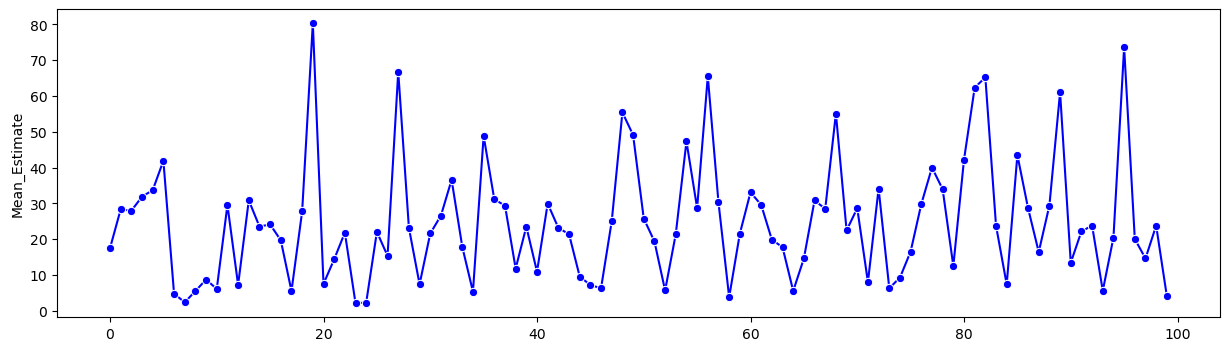

In [138]:
plt.figure(figsize =(15,4))

data1=df_obesity.head(100)

sns.lineplot(data=data1, x= data1.index, y="Mean_Estimate", marker = 'o', color='blue')
plt.show()

# using the first 100 records as sample, could see some outliers in the data of Mean_Estimates

C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


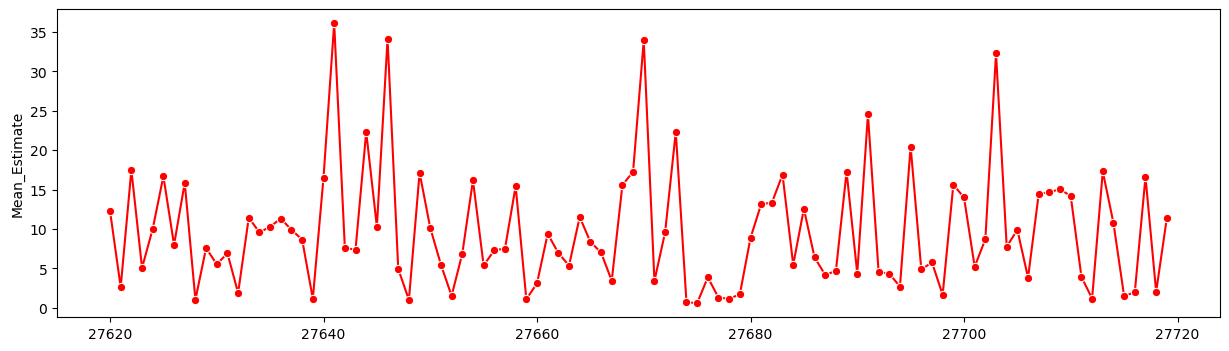

In [139]:
plt.figure(figsize =(15,4))


data2=df_obesity.tail(100)
sns.lineplot(data=data2, x= data2.index, y="Mean_Estimate", marker = 'o', color='red')
plt.show()


C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


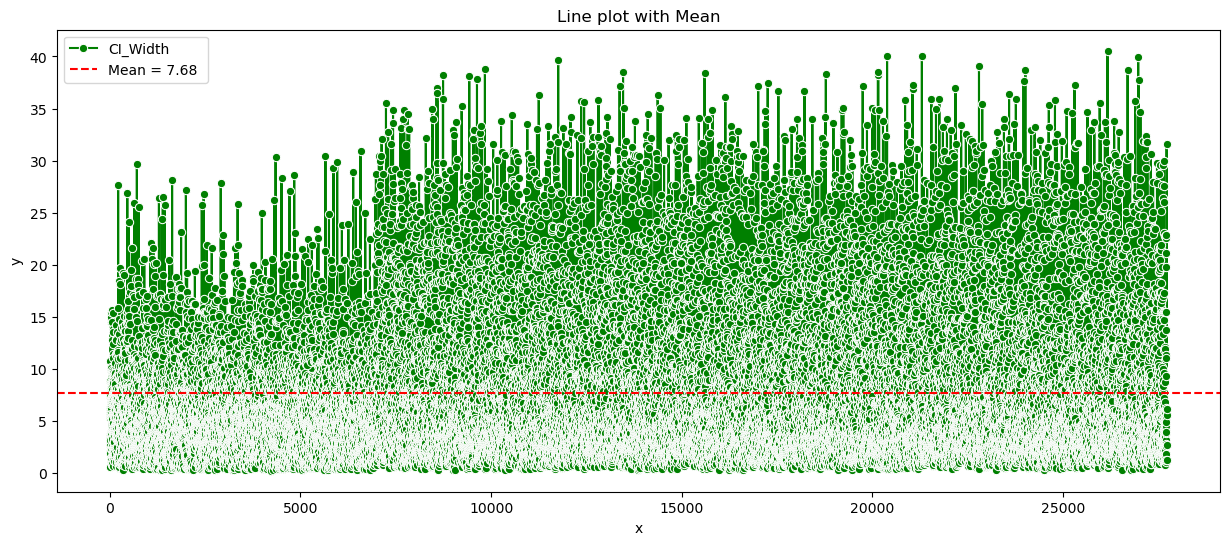

In [140]:
plt.figure(figsize=(15,6))

data1=df_obesity

sns.lineplot(data=data1, x=data1.index, y= "CI_Width", marker='o', color='green', label="CI_Width")

mean_y=data1['CI_Width'].mean()
plt.axhline(y=mean_y, color= 'red', linestyle='--', label= f'Mean = {mean_y:0.2f} ')

plt.title('Line plot with Mean')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()



In [141]:
region_count=data1.groupby("Region")["Country"].nunique().reset_index()

In [142]:
region_count

,Region,Country
0,Africa,185
1,Americas,180
2,Eastern Mediterranean,142
3,Europe,193
4,South-East Asia,80
5,Western Pacific,171


C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


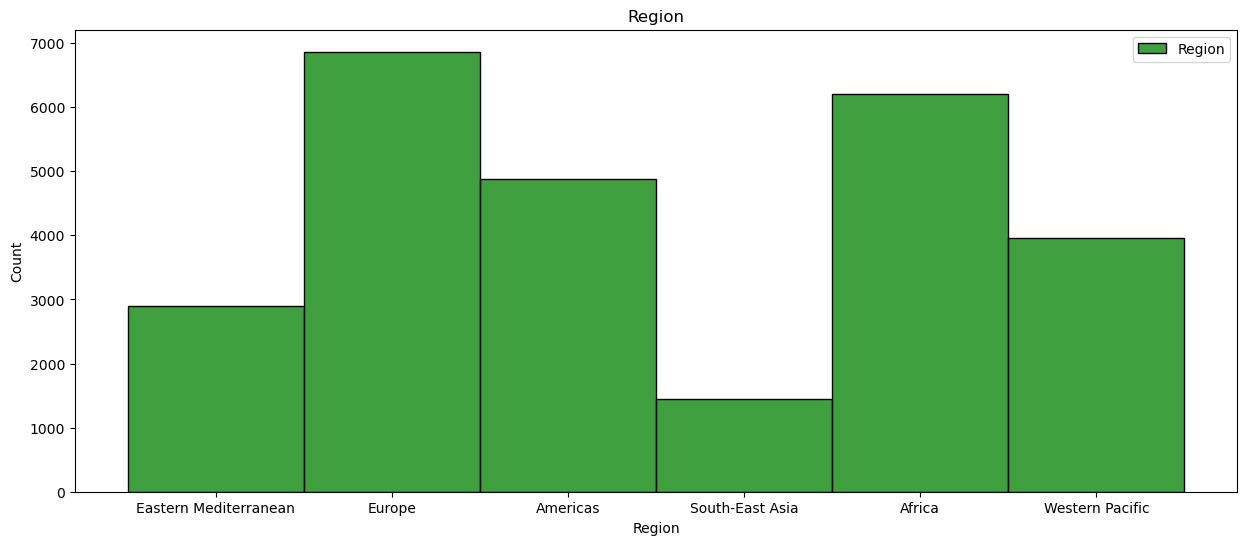

In [143]:
plt.figure(figsize=(15,6))
sns.histplot(data=data1, x="Region", label ="Region", color="green")

plt.legend()
plt.title("Region" )
plt.show()

In [144]:
st_bar = data1.groupby(["Region", "Age_Group"]).agg({
    "Country":'count'
}).reset_index().pivot_table(columns="Age_Group", index="Region", values="Country")

In [145]:
st_bar

Age_Group,Adult,Child
Region,,
Africa,1551.0,4653.0
Americas,1221.0,3663.0
Eastern Mediterranean,726.0,2178.0
Europe,1716.0,5148.0
South-East Asia,363.0,1089.0
Western Pacific,990.0,2970.0


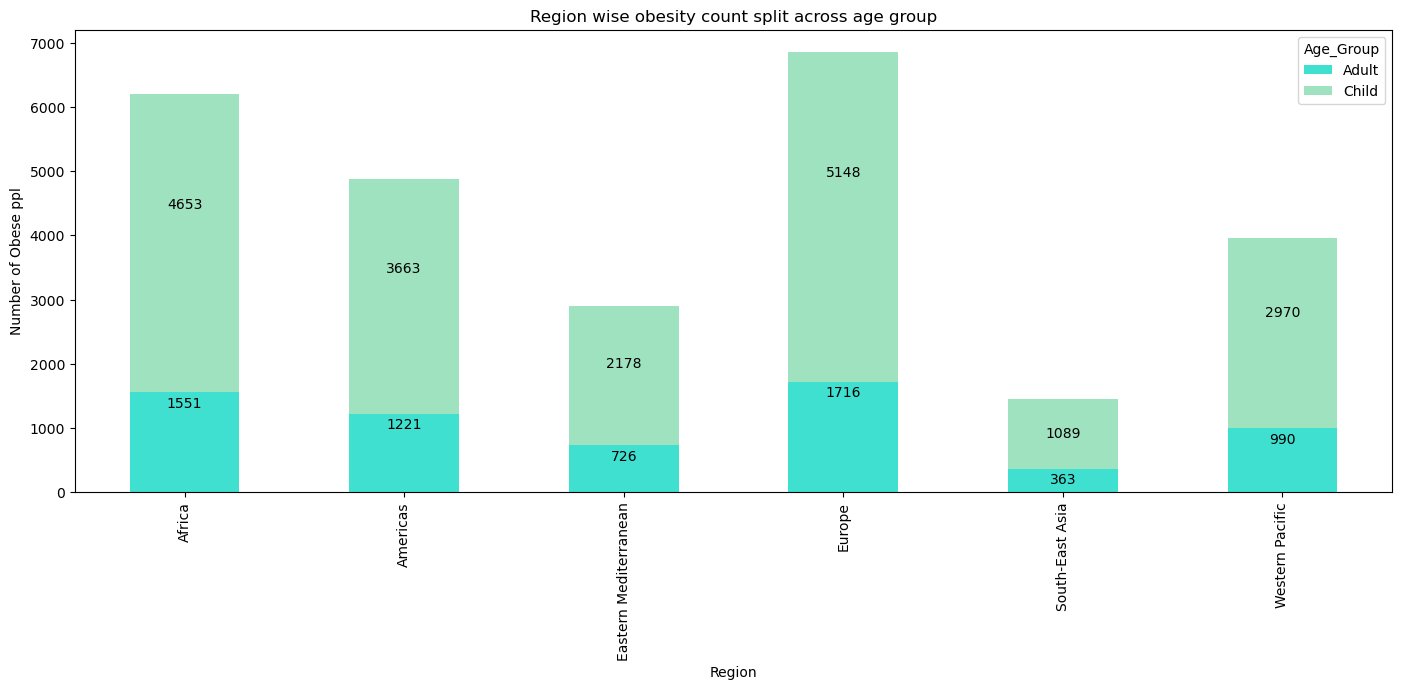

In [146]:
ax= st_bar.plot(kind="bar", stacked= True, figsize=(17,6), color = ['#40E0D0', '#9FE2BF'])

ax.set_title("Region wise obesity count split across age group")
ax.set_xlabel('Region')
ax.set_ylabel('Number of Obese ppl')
#ax.set_xticklabels(('Male', 'Female'))

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    #space = 1
    label = "{:.0f}".format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, -13), textcoords="offset points", ha='center', va='bottom')

plt.show()

In [147]:
country_level_counts= data1.groupby(["Region", "Obesity_Level"])["Country"].nunique().reset_index()

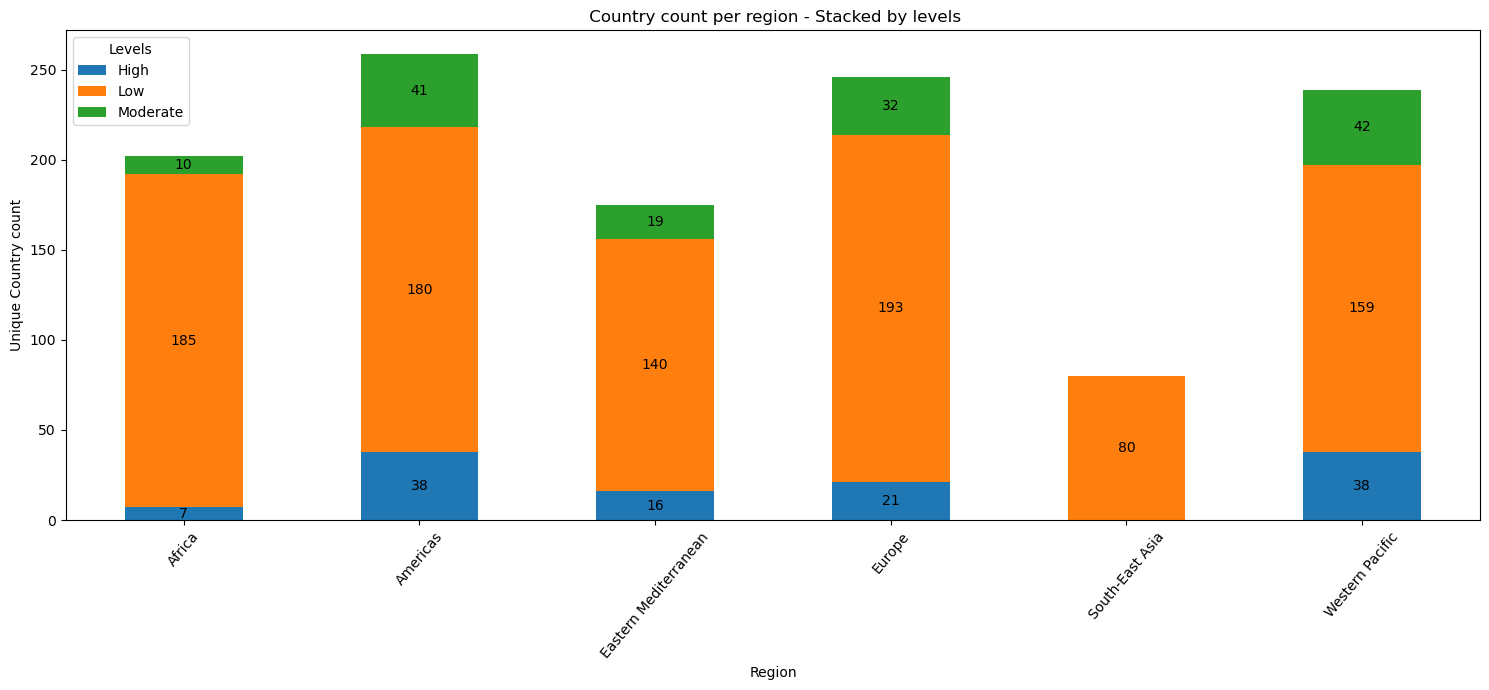

In [148]:
pivot_df= country_level_counts.pivot(index="Region", columns="Obesity_Level", values="Country").fillna(0)

ax= pivot_df.plot(kind="bar", stacked= True, figsize=(15,7))

for idx, region in enumerate(pivot_df.index):
    y_offset = 0
    for level in pivot_df.columns:
        value= pivot_df.loc[region, level]
        if value >0:
            ax.text(idx, y_offset + value /2, int(value), ha="center", va="center", fontsize = 10)
            y_offset += value
            
plt.title(" Country count per region - Stacked by levels")
plt.ylabel("Unique Country count")
plt.xlabel("Region")
plt.xticks(rotation=50)
plt.legend(title="Levels")
plt.tight_layout()
plt.show()

C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

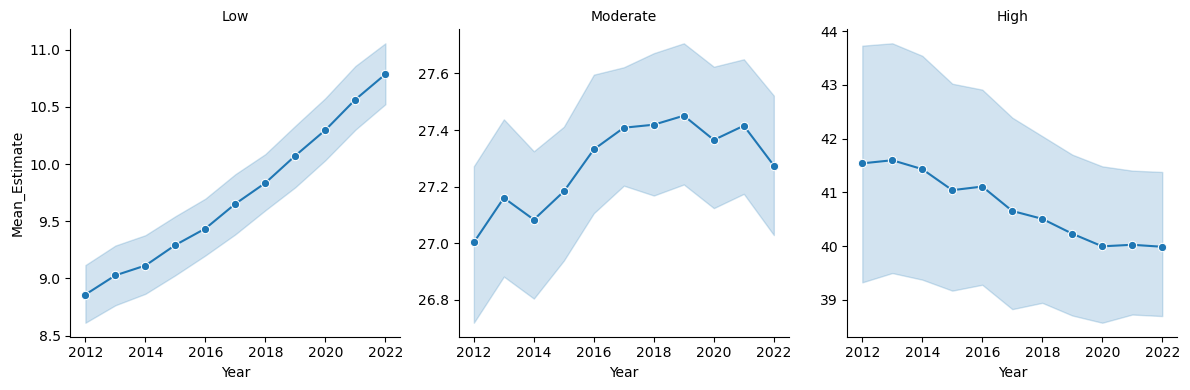

In [149]:
g=sns.FacetGrid(data1, col="Obesity_Level", col_wrap=3, height= 4, sharey= False )
g.map_dataframe(sns.lineplot, x="Year", y="Mean_Estimate", marker='o')

g.set_titles("{col_name}")
g.set_axis_labels("Year","Mean_Estimate")
plt.tight_layout()
plt.show()

C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


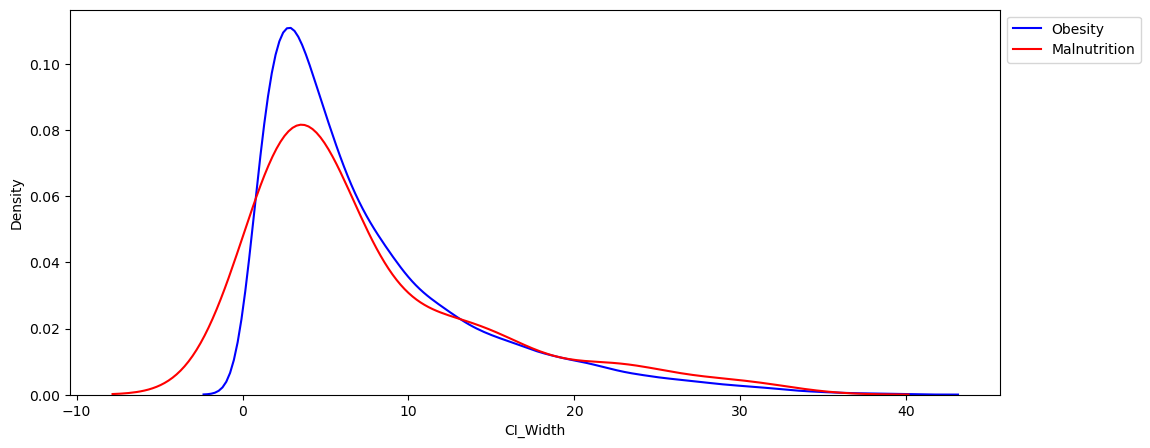

In [150]:




plt.figure(figsize= (12, 5) )
sns.kdeplot(data1['CI_Width'], color="blue")
sns.kdeplot(data2['CI_Width'], color="red")

plt.legend(labels=["Obesity", "Malnutrition"], loc=2, bbox_to_anchor=(1, 1))


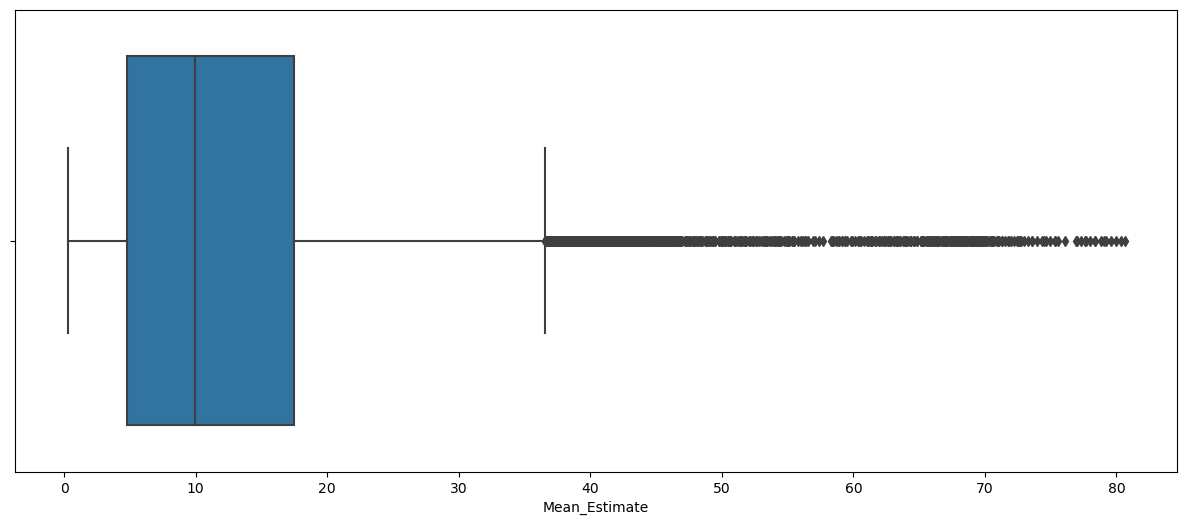

In [151]:
fig, ax = plt.subplots(figsize = (15,6))

sns.boxplot(data=data1, x= "Mean_Estimate")

plt.show()

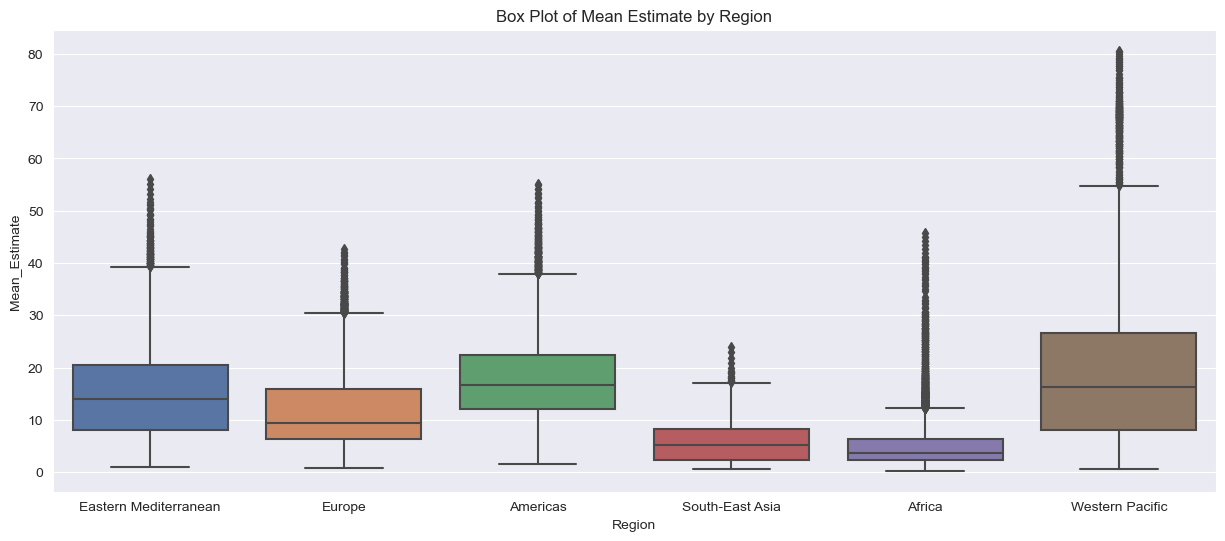

In [152]:
plt.figure(figsize=(15,6))
sns.set_style("darkgrid")
sns.boxplot(data=data1, x="Region", y="Mean_Estimate", palette="deep")
plt.title("Box Plot of Mean Estimate by Region")

plt.xlabel("Region")
plt.ylabel("Mean_Estimate")

plt.show()

In [153]:
fig = px.scatter_3d(
            data_frame= data1.head(100),
            x = data1.head(100).index,
            y = "Year",
            z = "CI_Width",
            color = "Gender",
            width= 1200,
            height= 600,
            hover_data= ["Country", "Age_Group"]
)

fig.show()

NameError: name 'px' is not defined

In [ ]:
regions=df_obesity["Region"].unique()
n=len(regions)
cols=3
rows=(n+ cols - 1)//cols
fig, axes = plt.subplots(rows, cols, figsize= (15, 4 * rows), sharex=False, sharey=False)

for i , region in enumerate(regions):
    r= i//cols
    c=i%cols
    ax=axes[r,c] if rows >1 else axes[c]
    sns.scatterplot(data= data1[data1["Region"]==region], x ="Mean_Estimate", y="CI_Width", ax=ax)
    ax.set_title(f'{region}')
    ax.set_xlabel("Mean_Estimate")
    ax.set_ylabel("CI_Width")
    
# to hide unused axes

for j in range(i+1, rows * cols):
    fig.delaxes(axes[j//cols, j%cols] if rows > 1 else axes[j % cols])
    

plt.tight_layout()
plt.show()

In [ ]:
data2= df_malnutrition

In [ ]:
#EDA of Malnutrition dataframe

In [ ]:
plt.figure(figsize =(15,4))

data2=df_malnutrition.head(100)

sns.lineplot(data=data2, x= data2.index, y="Mean_Estimate", marker = 'o', color='blue')
plt.show()

# using the first 100 records as sample, could see some outliers in the data of Mean_Estimates

In [ ]:
plt.figure(figsize =(15,4))


data2=df_malnutrition.tail(100)
sns.lineplot(data=data2, x= data2.index, y="Mean_Estimate", marker = 'o', color='red')
plt.show()


C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


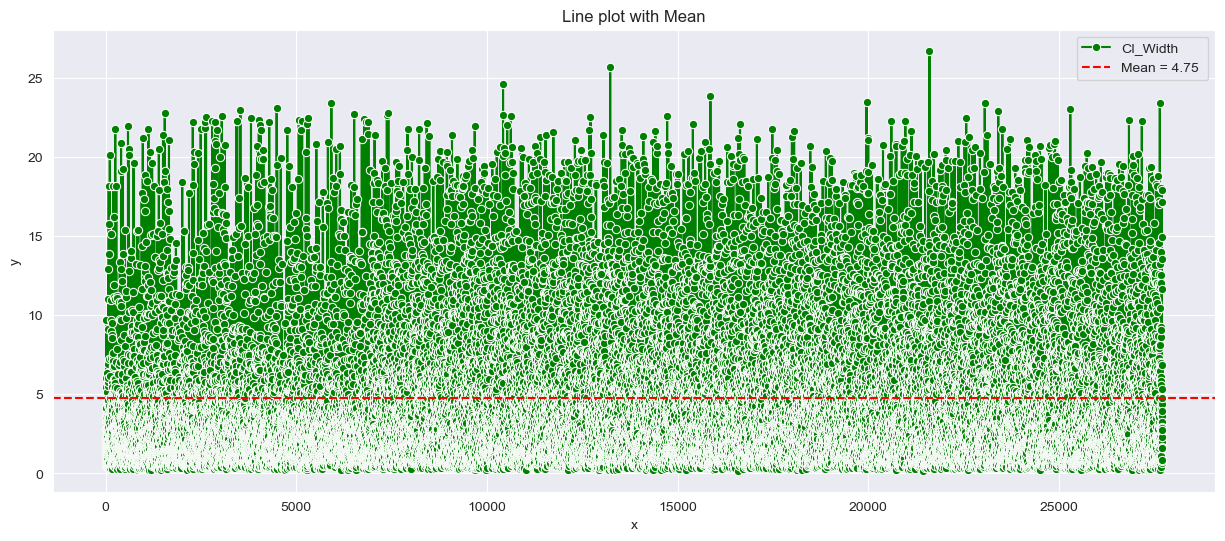

In [154]:
plt.figure(figsize=(15,6))

data2=df_malnutrition

sns.lineplot(data=data2, x=data2.index, y= "CI_Width", marker='o', color='green', label="CI_Width")

mean_y=data2['CI_Width'].mean()
plt.axhline(y=mean_y, color= 'red', linestyle='--', label= f'Mean = {mean_y:0.2f} ')

plt.title('Line plot with Mean')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()



In [155]:
region_count1=data2.groupby("Region")["Country"].nunique().reset_index()

In [156]:
region_count1

,Region,Country
0,Africa,193
1,Americas,172
2,Eastern Mediterranean,139
3,Europe,187
4,South-East Asia,92
5,SpecialCase,11
6,Western Pacific,168


C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


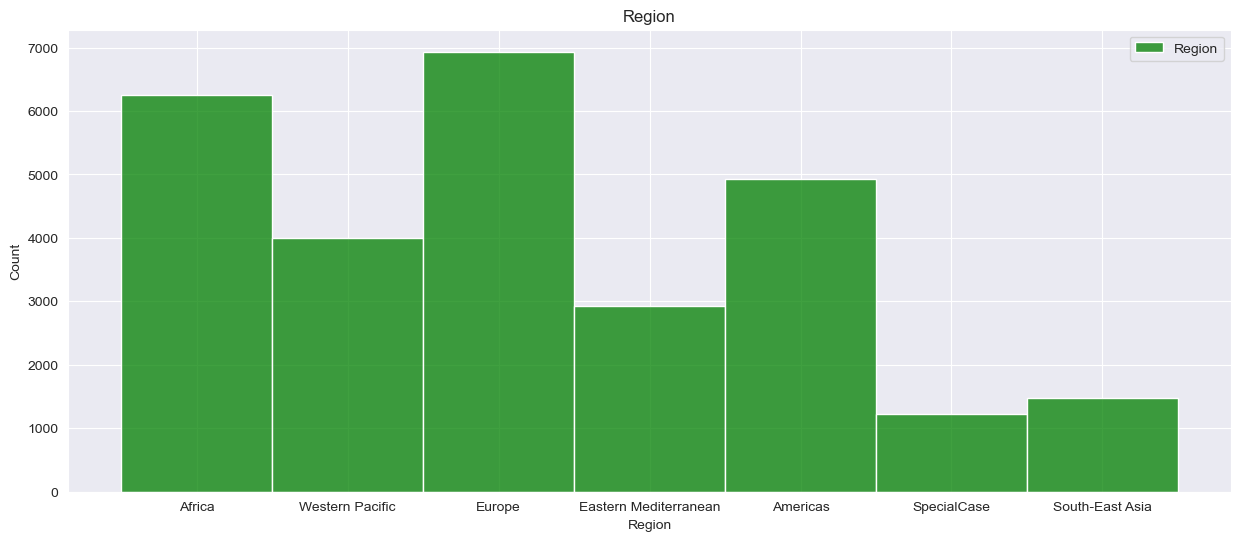

In [157]:
plt.figure(figsize=(15,6))
sns.histplot(data=data2, x="Region", label ="Region", color="green")

plt.legend()
plt.title("Region" )
plt.show()

In [158]:
st_bar1 = data2.groupby(["Region", "Age_Group"]).agg({
    "Country":'count'
}).reset_index().pivot_table(columns="Age_Group", index="Region", values="Country")

In [159]:
st_bar1

Age_Group,Adult,Child
Region,,
Africa,1574.0,4673.0
Americas,1243.0,3685.0
Eastern Mediterranean,736.0,2190.0
Europe,1752.0,5183.0
South-East Asia,371.0,1100.0
SpecialCase,247.0,971.0
Western Pacific,1007.0,2988.0


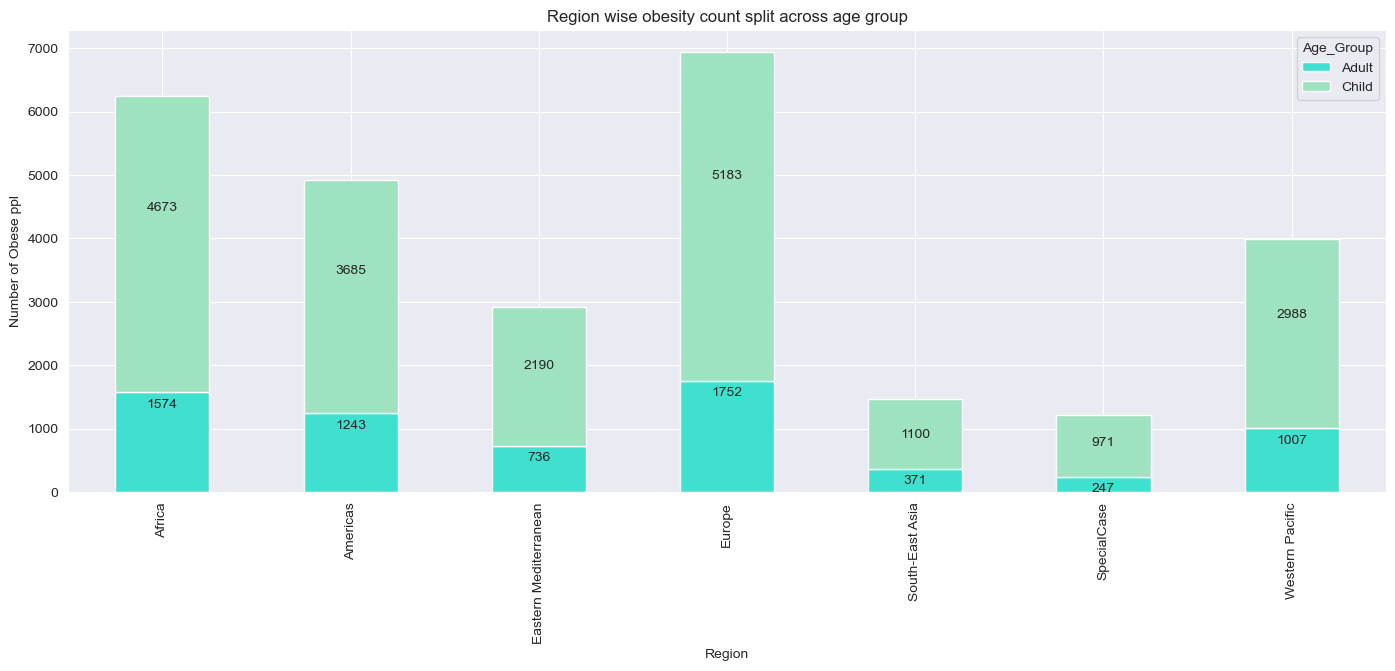

In [160]:
ax= st_bar1.plot(kind="bar", stacked= True, figsize=(17,6), color = ['#40E0D0', '#9FE2BF'])

ax.set_title("Region wise obesity count split across age group")
ax.set_xlabel('Region')
ax.set_ylabel('Number of Obese ppl')
#ax.set_xticklabels(('Male', 'Female'))

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    #space = 1
    label = "{:.0f}".format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, -13), textcoords="offset points", ha='center', va='bottom')

plt.show()

In [161]:
country_level_counts1= data2.groupby(["Region", "Malnutrition_Level"])["Country"].nunique().reset_index()

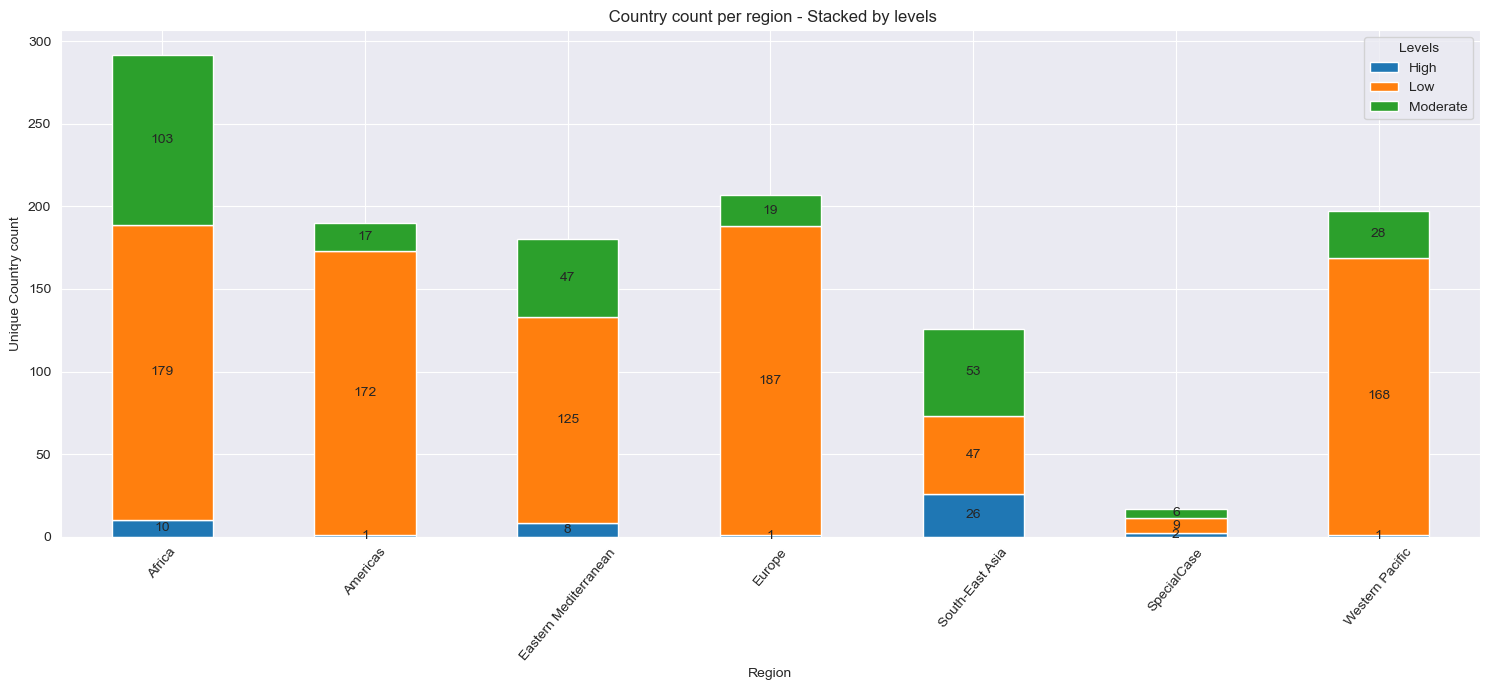

In [162]:
pivot_df= country_level_counts1.pivot(index="Region", columns="Malnutrition_Level", values="Country").fillna(0)

ax= pivot_df.plot(kind="bar", stacked= True, figsize=(15,7))

for idx, region in enumerate(pivot_df.index):
    y_offset = 0
    for level in pivot_df.columns:
        value= pivot_df.loc[region, level]
        if value >0:
            ax.text(idx, y_offset + value /2, int(value), ha="center", va="center", fontsize = 10)
            y_offset += value
            
plt.title(" Country count per region - Stacked by levels")
plt.ylabel("Unique Country count")
plt.xlabel("Region")
plt.xticks(rotation=50)
plt.legend(title="Levels")
plt.tight_layout()
plt.show()

C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

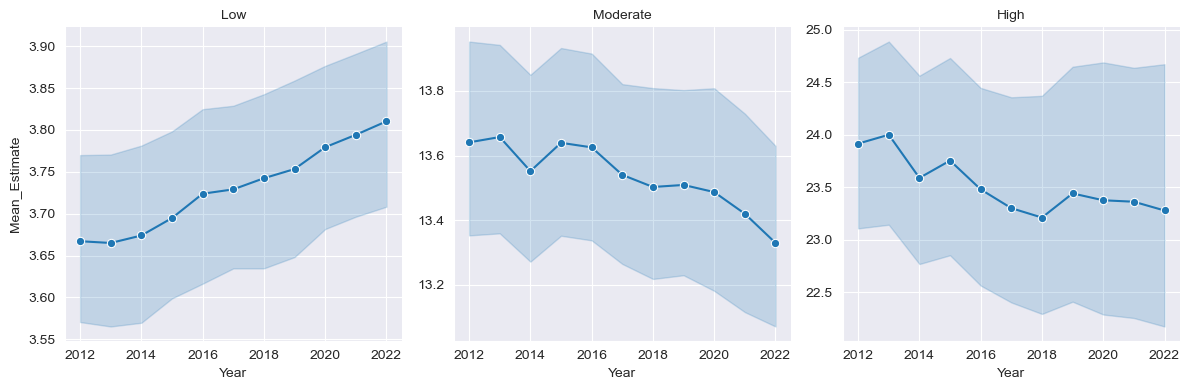

In [163]:
g1=sns.FacetGrid(data2, col="Malnutrition_Level", col_wrap=3, height= 4, sharey= False )
g1.map_dataframe(sns.lineplot, x="Year", y="Mean_Estimate", marker='o')

g1.set_titles("{col_name}")
g1.set_axis_labels("Year","Mean_Estimate")
plt.tight_layout()
plt.show()

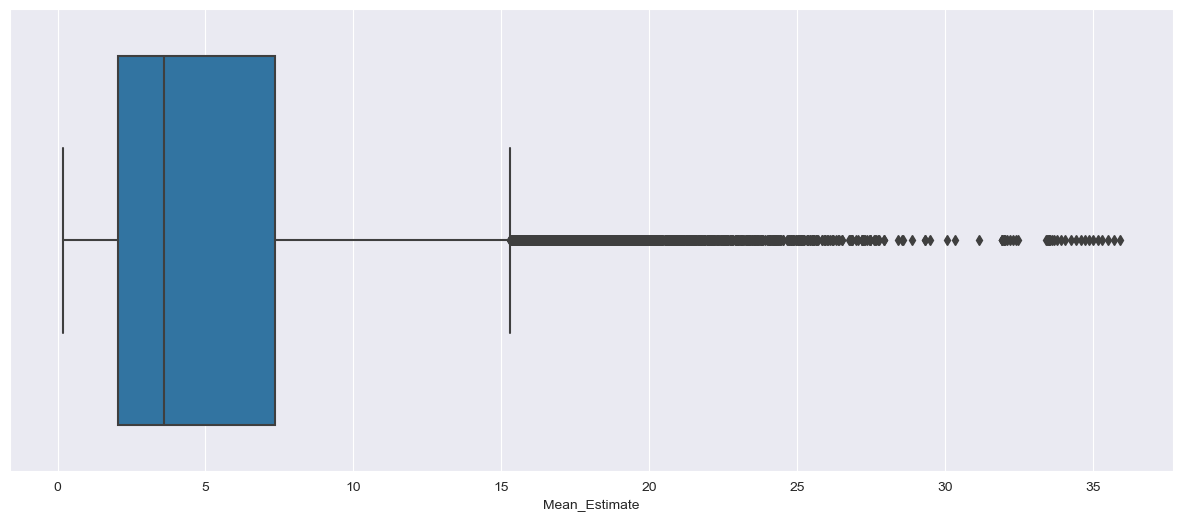

In [164]:
fig, ax = plt.subplots(figsize = (15,6))

sns.boxplot(data=data2, x= "Mean_Estimate")

plt.show()

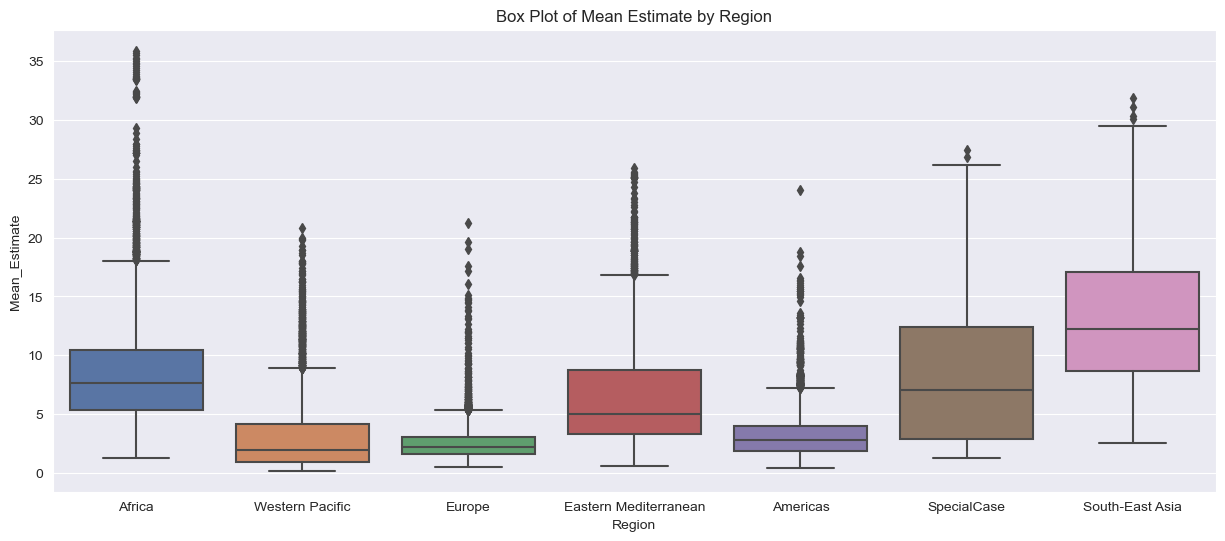

In [165]:
plt.figure(figsize=(15,6))
sns.set_style("darkgrid")
sns.boxplot(data=data2, x="Region", y="Mean_Estimate", palette="deep")
plt.title("Box Plot of Mean Estimate by Region")

plt.xlabel("Region")
plt.ylabel("Mean_Estimate")

plt.show()

In [166]:
fig = px.scatter_3d(
            data_frame= data2.head(100),
            x = data2.head(100).index,
            y = "Year",
            z = "CI_Width",
            color = "Gender",
            width= 1200,
            height= 600,
            hover_data= ["Country", "Age_Group"]
)

fig.show()

NameError: name 'px' is not defined

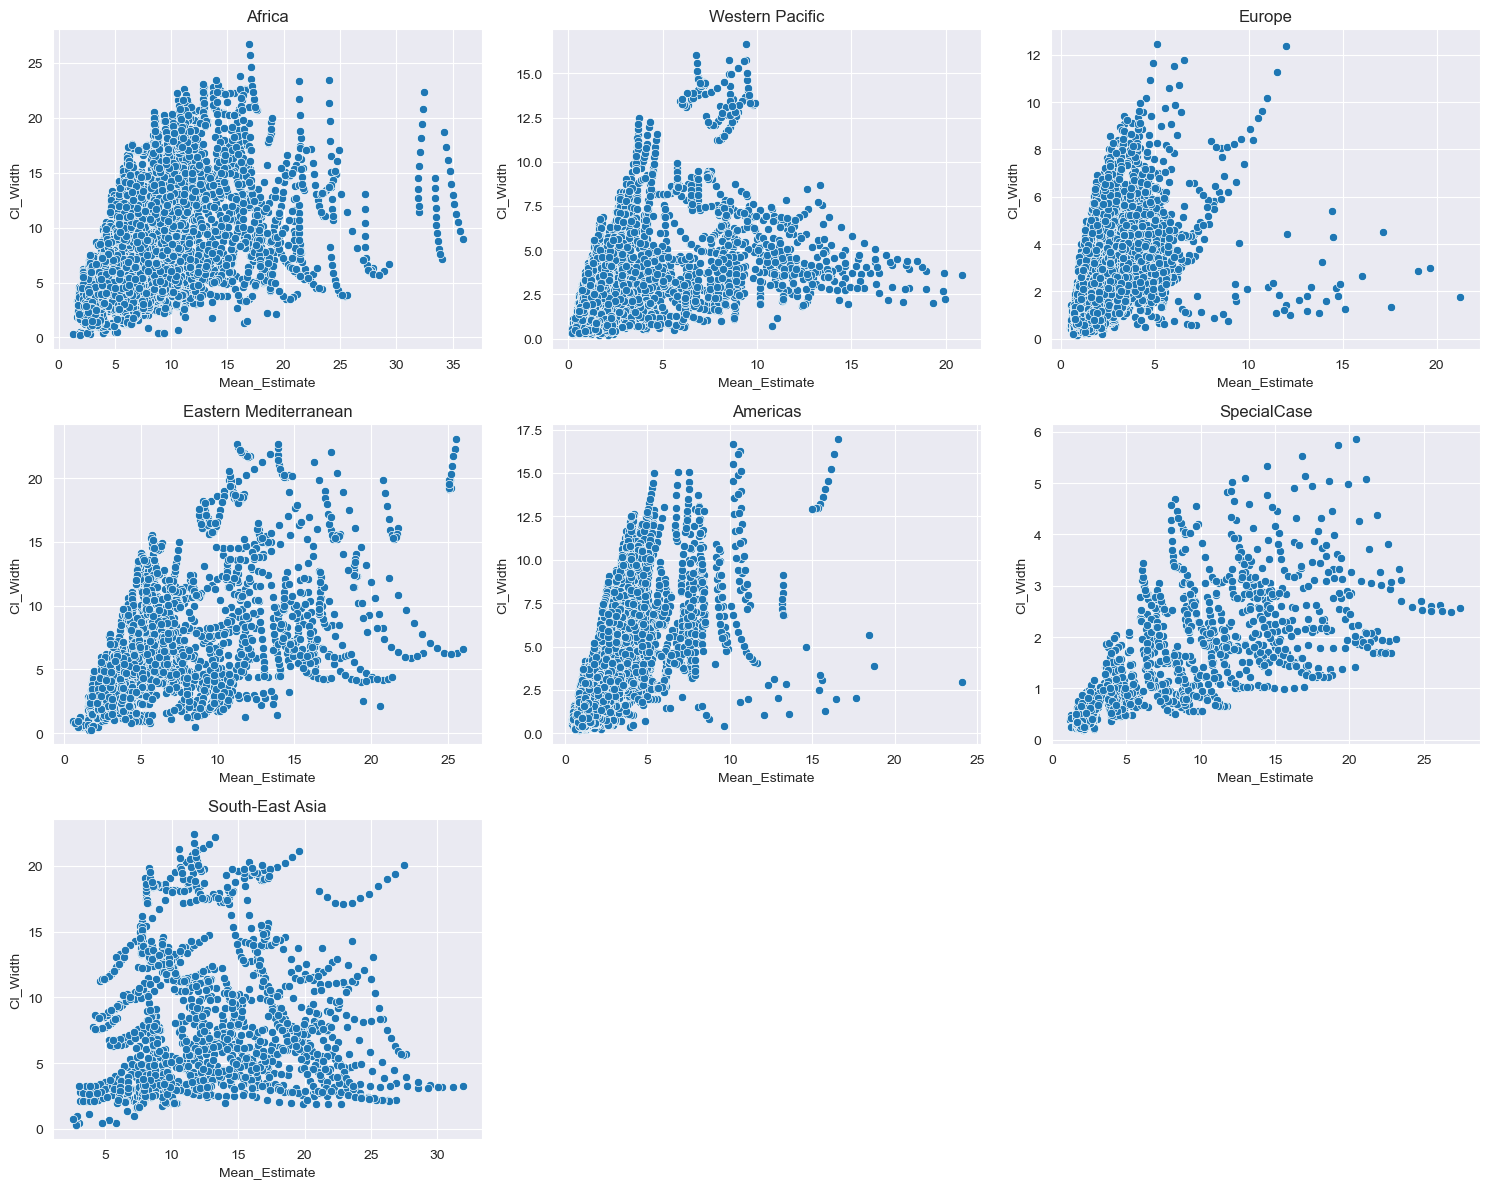

In [167]:
regions1=df_malnutrition["Region"].unique()
n=len(regions1)
cols=3
rows=(n+ cols - 1)//cols
fig, axes = plt.subplots(rows, cols, figsize= (15, 4 * rows), sharex=False, sharey=False)

for i , region in enumerate(regions1):
    r= i//cols
    c=i%cols
    ax=axes[r,c] if rows >1 else axes[c]
    sns.scatterplot(data= data2[data2["Region"]==region], x ="Mean_Estimate", y="CI_Width", ax=ax)
    ax.set_title(f'{region}')
    ax.set_xlabel("Mean_Estimate")
    ax.set_ylabel("CI_Width")
    
# to hide unused axes

for j in range(i+1, rows * cols):
    fig.delaxes(axes[j//cols, j%cols] if rows > 1 else axes[j % cols])
    

plt.tight_layout()
plt.show()

# DB & PYTHON CONNECTION

In [168]:
!pip install mysql-connector


Defaulting to user installation because normal site-packages is not writeable


In [169]:
connection=db.connect(
    host="localhost",
    user="Nutri",
    password="12345678",
    database="nutrition",
    auth_plugin='mysql_native_password'
)


curr=connection.cursor()

In [170]:
connection

In [177]:
curr.close()
connection.close()

In [171]:
!pip install pymysql

Defaulting to user installation because normal site-packages is not writeable


# insertion of data into SQL

In [172]:
# table creation (Obesity, Malnutrition)

from sqlalchemy import create_engine

In [179]:

host="localhost"
username="Nutri"
password="12345678"
schema_name="nutrition"
port='8080'

engine = create_engine(f'mysql+pymysql://{username}:{password}@{host}:{port}/{schema_name}')
#df.to_sql('your_table', con=engine, if_exists='append', index=False)

df_obesity.to_sql(name = 'Obesity', con=engine,schema = schema_name, if_exists='replace', index=False)

C:\Users\Aartthi\AppData\Local\Temp\ipykernel_34488\3061627292.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_obesity.to_sql(name = 'Obesity', con=engine,schema = schema_name, if_exists='replace', index=False)


AttributeError: 'Engine' object has no attribute 'cursor'